# Data Science Engineering Methods
### Abstract
Bike-sharing systems are key to sustainable urban transportation, reducing traffic and promoting healthier lifestyles. The dataset includes hourly and daily bike rental counts from Capital Bikeshare (2011-2012) with weather, seasonal, and temporal data. This analysis explores how weather affects rental patterns across seasons and whether rental numbers differ between weekdays and weekends, providing insights to optimize bike-sharing systems.
### Variable Description
| Variable              | Description                                                                |
|-----------------------|----------------------------------------------------------------------------|
| instant               | Record index                                                               |
| dteday                | Date                                                                       |
| season                | Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)                          |
| yr                    | Year (0: 2011, 1: 2012)                                                    |
| mnth                  | Month (1 to 12)                                                            |
| holiday               | Whether the day is a holiday (1: Yes, 0: No)                               |
| weekday               | Day of the week (0: Sunday to 6: Saturday)                                 |
| workingday            | Whether the day is a working day (1: Yes, 0: No)                           |
| weathersit            | Weather condition (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Heavy Rain)   |
| temp                  | Normalized temperature in Celsius (scaled to [0, 1])                       |
| atemp                 | Normalized feeling temperature (scaled to [0, 1])                          |
| hum                   | Normalized humidity (scaled to [0, 1])                                     |
| windspeed             | Normalized wind speed (scaled to [0, 1])                                   |
| casual                | Number of casual users                                                     |
| registered            | Number of registered users                                                 |
| cnt                   | Total bike rental count                                                    |
### Dataset
* The day.csv dataset will be the sole focus of this analysis. This file contains daily aggregated data spanning from 2011 to 2012 and includes 731 records with 16 attributes.
* The dataset consists of 12 independent variables such as season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, and windspeed, which capture temporal and weather-related information.
* The dependent variable is cnt, which represents the total number of bike rentals, including both casual and registered users.

In [2]:
# Required imports for the analysis and modeling
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import missingno as msno  # For visualizing missing values (install via: pip install missingno)
import matplotlib.pylab as plt  # For plotting
import shap  # For SHAP analysis (install via: pip install shap)
import seaborn as sns  # For advanced data visualization (install via: pip install seaborn)
from scipy.stats import zscore, f_oneway, kruskal, shapiro  # For statistical tests (install via: pip install scipy)
from sklearn.preprocessing import StandardScaler  # For feature scaling (install via: pip install scikit-learn)
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # For ensemble models

# Note: Make sure to install all the required libraries before running this code.
# Use the following commands in your terminal or notebook:
# pip install pandas numpy missingno matplotlib shap seaborn scipy scikit-learn


In [3]:
# Reading the Bike Sharing dataset

df_day = pd.read_csv('https://raw.githubusercontent.com/Sushma-Kunjangada-Arun/Data-Science-Eng-Methods-BikeSharing/refs/heads/main/bike%2Bsharing%2Bdataset/day.csv')

In [4]:
# saving a copy of the original dataset

df_day_copy = df_day.copy()

In [5]:
# Check the first few rows of the datasets

# day.csv
print(df_day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [6]:
df_day.shape

(731, 16)

##### The day.csv file contains 731 rows and 16 columns

In [7]:
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

### Datatypes
* Instant: An integer value that represents the record index.
* Dteday: A date field representing the day of the record (in 'YYYY-MM-DD' format).
* Season: Categorical feature (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter).
* Yr: A binary variable representing the year (0 = 2011, 1 = 2012).
* Mnt: An integer indicating the month of the year (1 = January, 12 = December).
* Holiday: A binary variable indicating whether the day is a holiday (0 = No, 1 = Yes).
* Weekday: An integer representing the weekday (0 = Sunday, 6 = Saturday).
* Workingday: A binary variable indicating whether the day is a working day (0 = No, 1 = Yes).
* Weathersit: Categorical feature representing the weather situation (1 = Clear, 2 = Misty, 3 = Light Snow/Rain, 4 = Heavy Snow/Rain).
* Temp: Temperature of the day (normalized value, originally in Celsius).
* Atemp: "Feels like" temperature (normalized value, originally in Celsius).
* Hum: Humidity of the day (normalized value, in percentage).
* Windspeed: Wind speed of the day (normalized value, in m/s).
* Casual: Number of casual users (integer).
* Registered: Number of registered users (integer).
* Cnt: Total number of bike rentals (sum of casual and registered users, dependent variable).

The Bike Sharing dataset contains 16 features, with both numerical and categorical variables, and the target variable is the total number of bike rentals (cnt).

#### Numerical features: 
Instant, Mnt, Temp, Atemp, Hum, Windspeed, Casual, Registered, Cnt

#### Categorical features:
Season, Yr, Holiday, Weekday, Workingday, Weathersit

### Missing Value Check

In [9]:
#checking if any data is missing
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<Axes: >

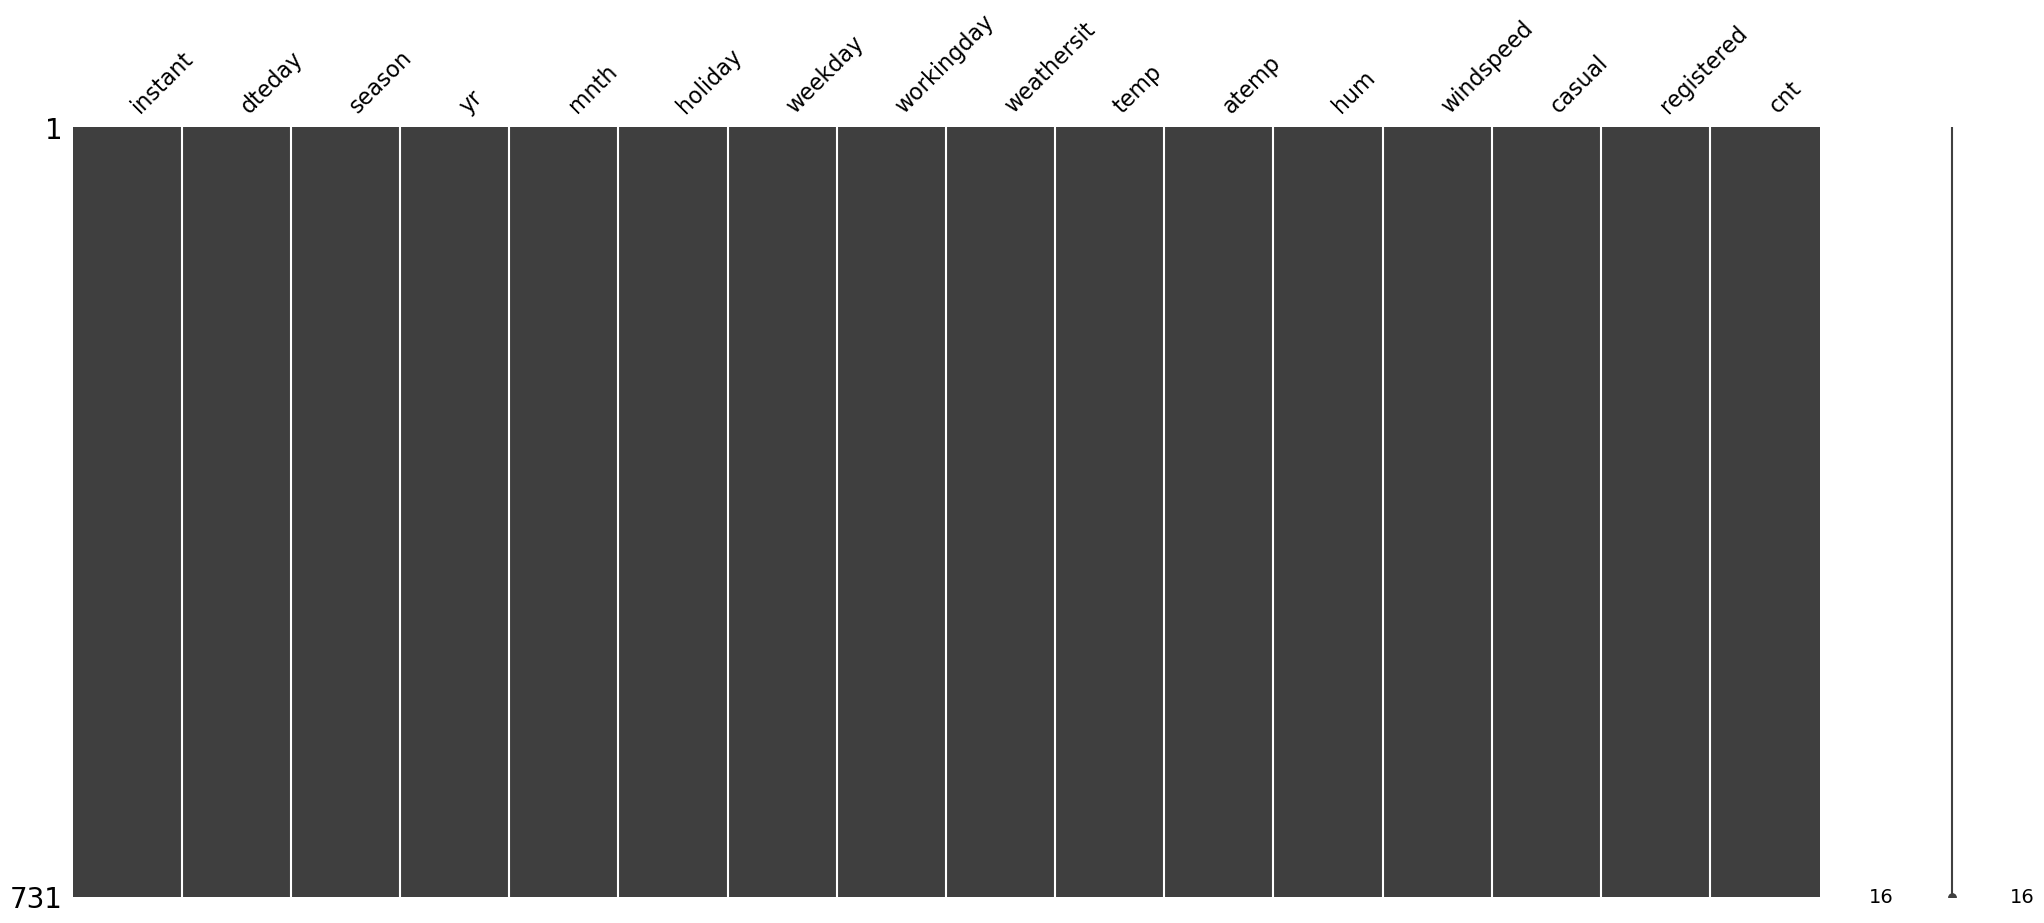

In [10]:
msno.matrix(df_day)

### Which independent variables have missing data?

There are no missing values in the data.

### Dropping feature
There is one feature that can be dropped to improve the accuracy of predictions. The feature is:
* Instant: The "Instant" column represents a record index and does not provide any useful information for predicting bike rentals. It is just an identifier and is not related to the bike rental patterns, so it can be dropped.

In [11]:
df_day = df_day.drop(["instant"],axis = 1)
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Dropping instant column as it is just an identifier and is not related to the bike rental patterns.

In [12]:
# This gives information about dataset like column data types, column labels, number of columns,
# number of cell in each column which are not null, range index
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


### Univariate analysis

In [13]:
# provides some statistical information of data in data frame
df_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Observations so far:
#### General Trends:
* Total Rentals (cnt):
  * Daily rentals average ~4504, while hourly rentals average ~189.
  * Distribution is slightly right-skewed, with higher rentals occurring on favorable days.
  * Peak rentals likely occur on weekends or during commute hours.
#### Weather Effects:
* Temperature (temp, atemp):
  * Higher rentals are associated with moderate to warm temperatures (0.3 to 0.7 normalized range).
  * Slight left skew indicates more data concentrated around higher temperatures.
* Humidity (hum):
  * Average humidity is high (~0.63), but extreme high humidity may discourage biking.
  * Rentals are likely lower on very humid days.
* Wind Speed (windspeed):
  * Most wind speeds are low (~0.19 average), which is favorable for biking.
  * Higher wind speeds are rare and likely negatively impact rentals.
#### Seasonal Variations (season):
* Rentals are highest in summer (season=2) and fall (season=3) due to favorable weather.
* Rentals are lowest in winter (season=1) due to colder weather.
#### Temporal Patterns:
* Weekdays vs. Weekends (weekday):
  * Higher rentals on weekends due to casual users engaging in recreational activities.
#### User Type Behavior (casual vs. registered):
* Registered Users:
  Dominate total rentals (~153/hour), showing consistent trends driven by daily commuting patterns.
* Casual Users:
  Lower average rentals (~35/hour), with higher variability influenced by weather and holidays.
#### Holiday and Working Day Effects (holiday, workingday):
* Rentals are lower on holidays, as registered users (commuters) are less active.
* Rentals are higher on working days, especially during commute hours.
#### Weather Situations (weathersit):
* Rentals are highest during clear or partly cloudy days (weathersit=1).
* Rentals decrease significantly during misty or rainy/snowy conditions (weathersit=2, 3, 4).
* 

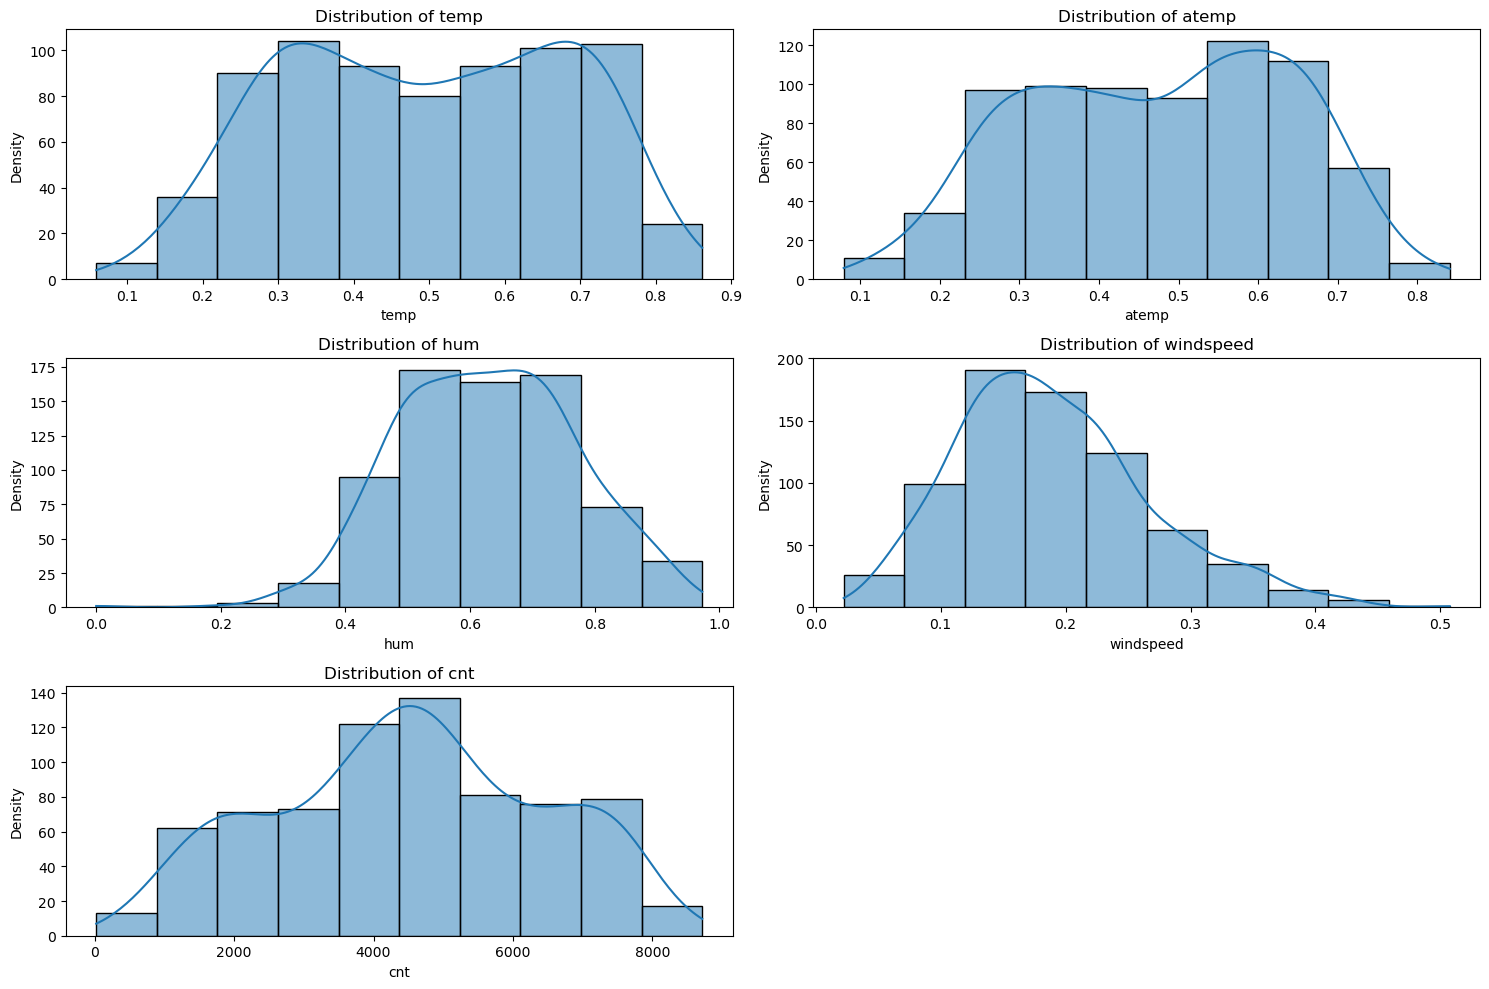

In [14]:
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_day[feature].dropna(), kde=True, bins=10, edgecolor='black')  # Explicit dropna()
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

### Observations So Far
#### Temperature (temp):
* The graph shows two distinct peaks, indicating a bimodal distribution for temperature. 
* Most temperature values are concentrated between 0.3 and 0.7 (normalized scale), corresponding to moderate temperatures.
#### "Feels Like" Temperature (atemp):
* The graph shows two distinct peaks, indicating a bimodal distribution for temperature. 
* The majority of values are concentrated between 0.4 and 0.7 on the normalized scale, indicating moderate "feels like" temperatures dominate the dataset.
#### Humidity (hum):
* The data appears slightly right-skewed, with most values between 0.4 and 0.8.
#### Windspeed (windspeed):
* The distribution has a noticeable right skew, with a longer tail towards higher windspeed values (0.4–0.5).
#### Bike Count (cnt):
* The graph exhibits three distinct peaks, suggesting a multimodal distribution for total bike rentals.
* Most bike rental counts fall between 2,000 and 6,000, indicating moderate demand dominates the dataset.

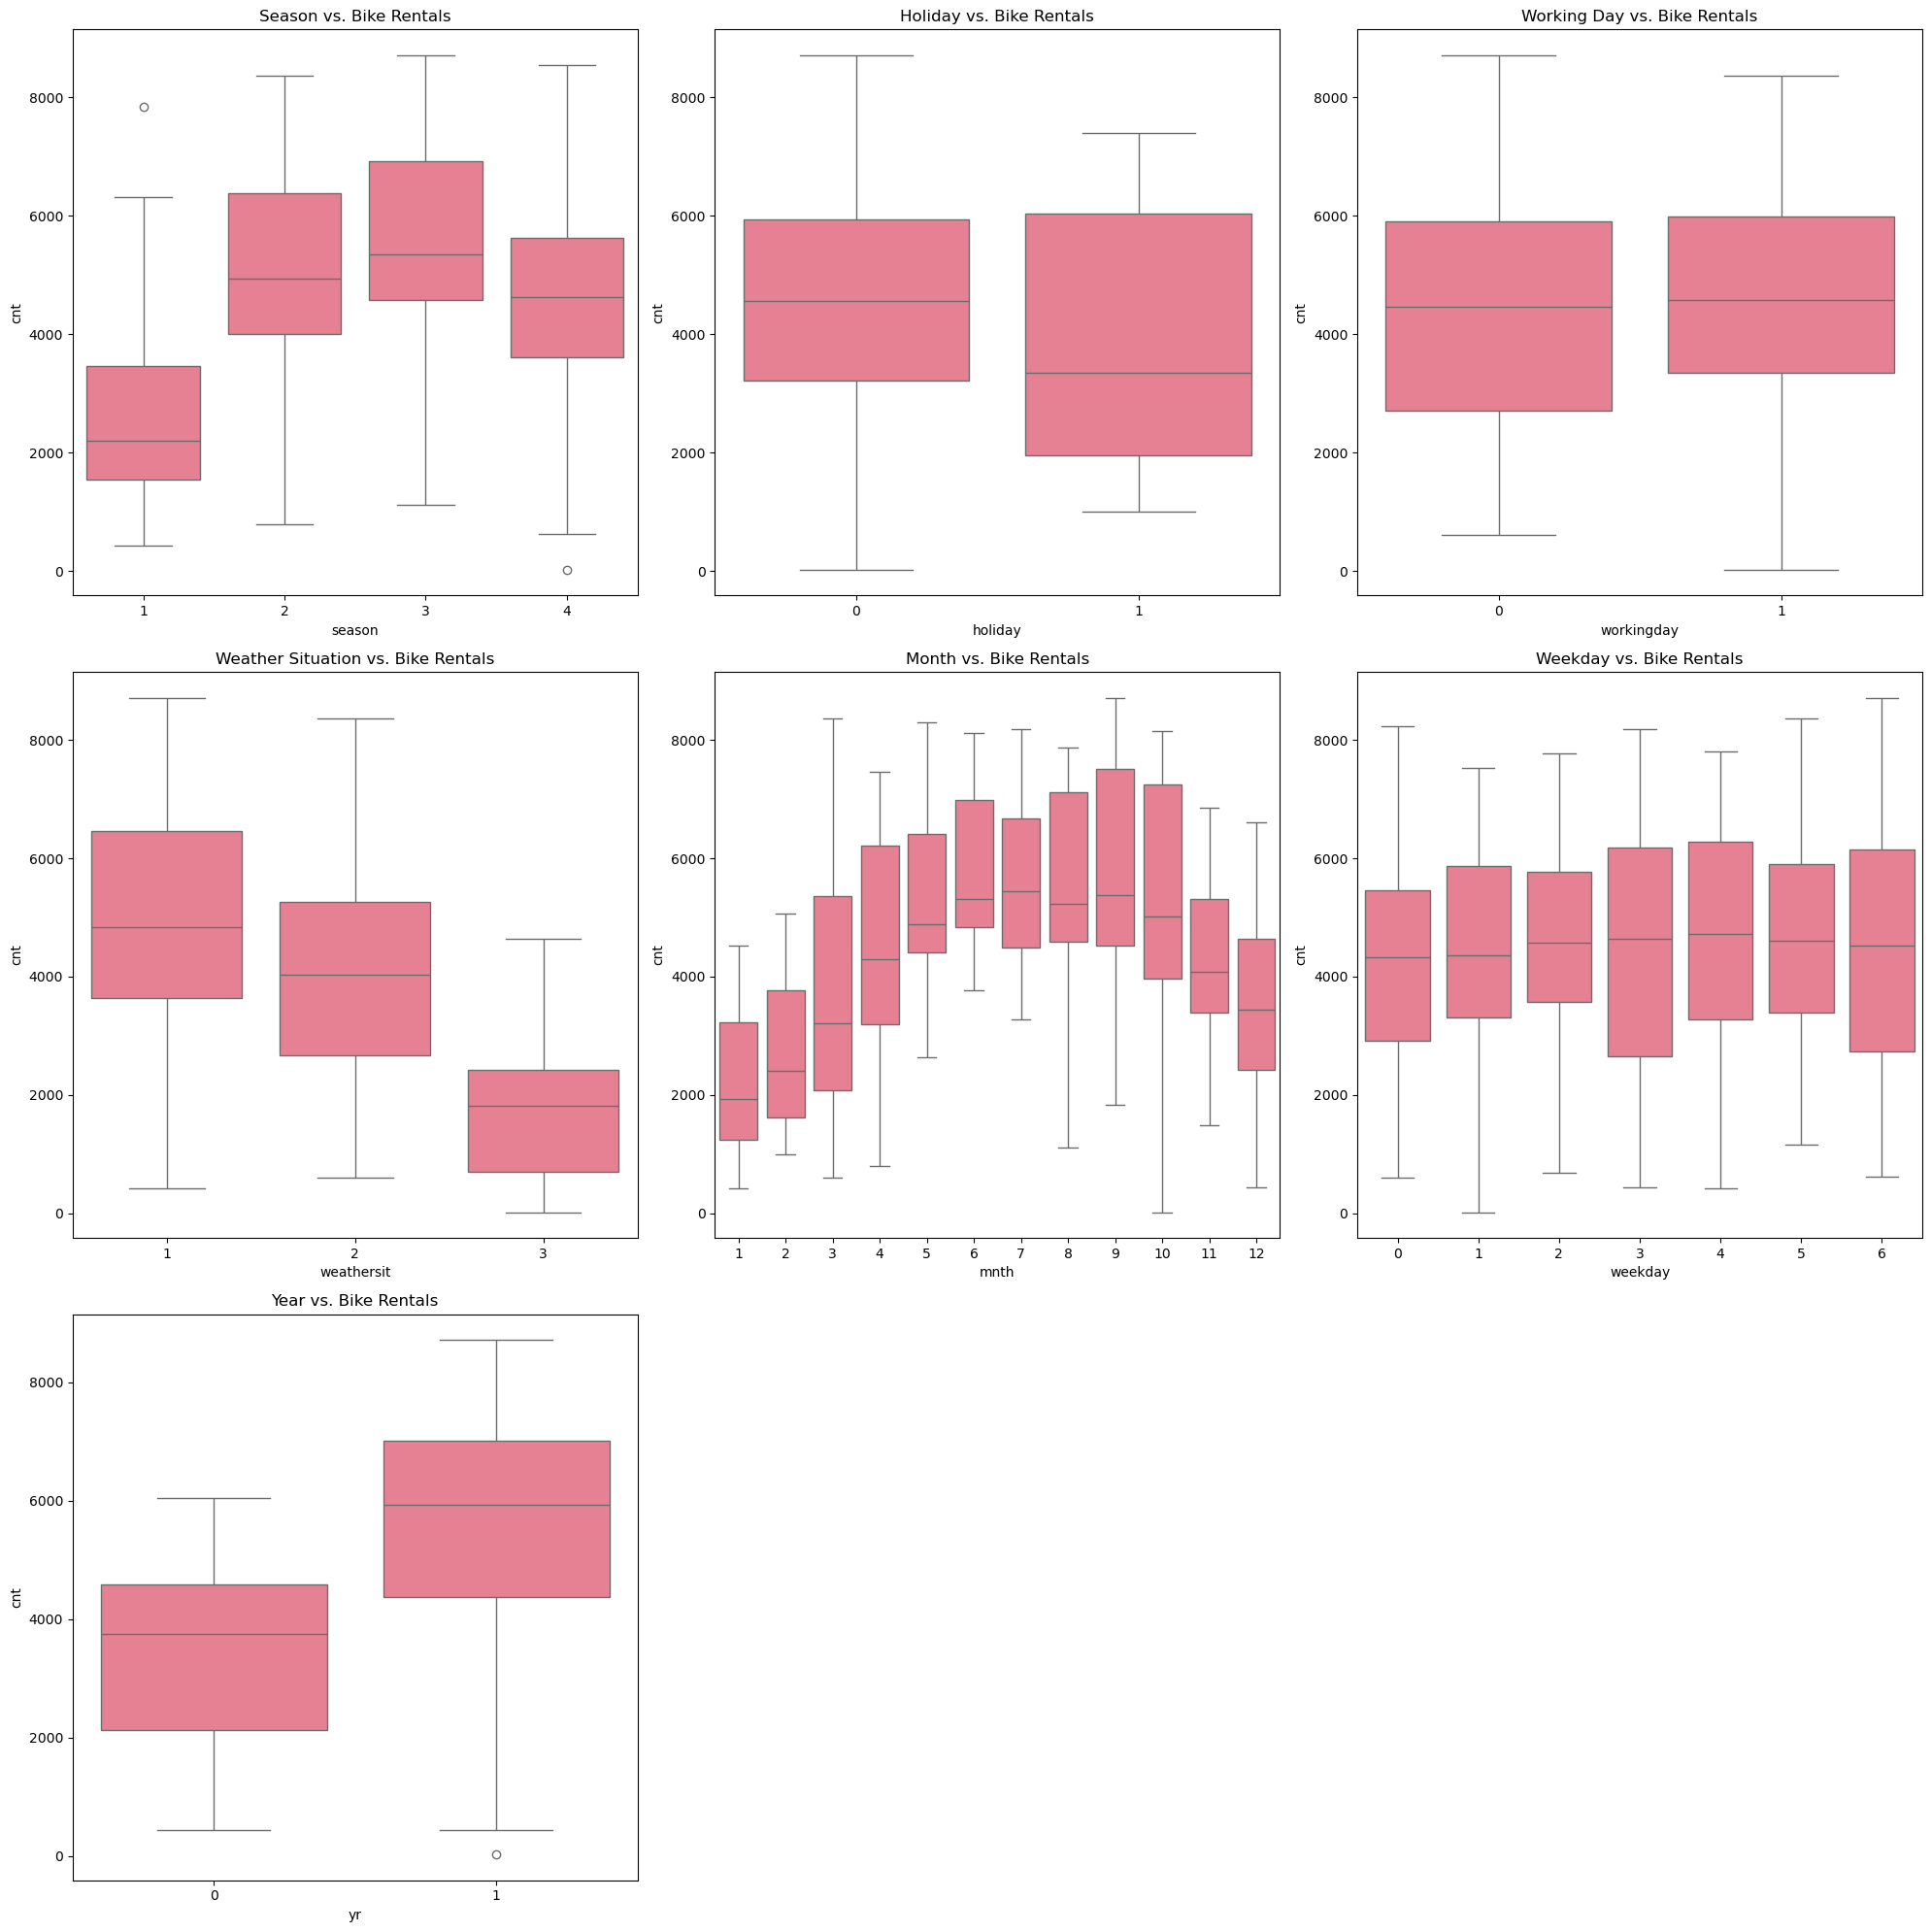

In [15]:
sns.set_palette("husl")

# Set the figure size for all the plots
plt.figure(figsize=(20, 20))

# Boxplot for season vs. cnt
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=df_day)
plt.title('Season vs. Bike Rentals')

# Boxplot for holiday vs. cnt
plt.subplot(3, 3, 2)
sns.boxplot(x='holiday', y='cnt', data=df_day)
plt.title('Holiday vs. Bike Rentals')

# Boxplot for workingday vs. cnt
plt.subplot(3, 3, 3)
sns.boxplot(x='workingday', y='cnt', data=df_day)
plt.title('Working Day vs. Bike Rentals')

# Boxplot for weathersit vs. cnt
plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Weather Situation vs. Bike Rentals')

# Boxplot for mnth vs. cnt
plt.subplot(3, 3, 5)
sns.boxplot(x='mnth', y='cnt', data=df_day)
plt.title('Month vs. Bike Rentals')

# Boxplot for weekday vs. cnt
plt.subplot(3, 3, 6)
sns.boxplot(x='weekday', y='cnt', data=df_day)
plt.title('Weekday vs. Bike Rentals')

# Boxplot for yr vs. cnt
plt.subplot(3, 3, 7)
sns.boxplot(x='yr', y='cnt', data=df_day)
plt.title('Year vs. Bike Rentals')

# Show all the plots
plt.tight_layout()
plt.show()


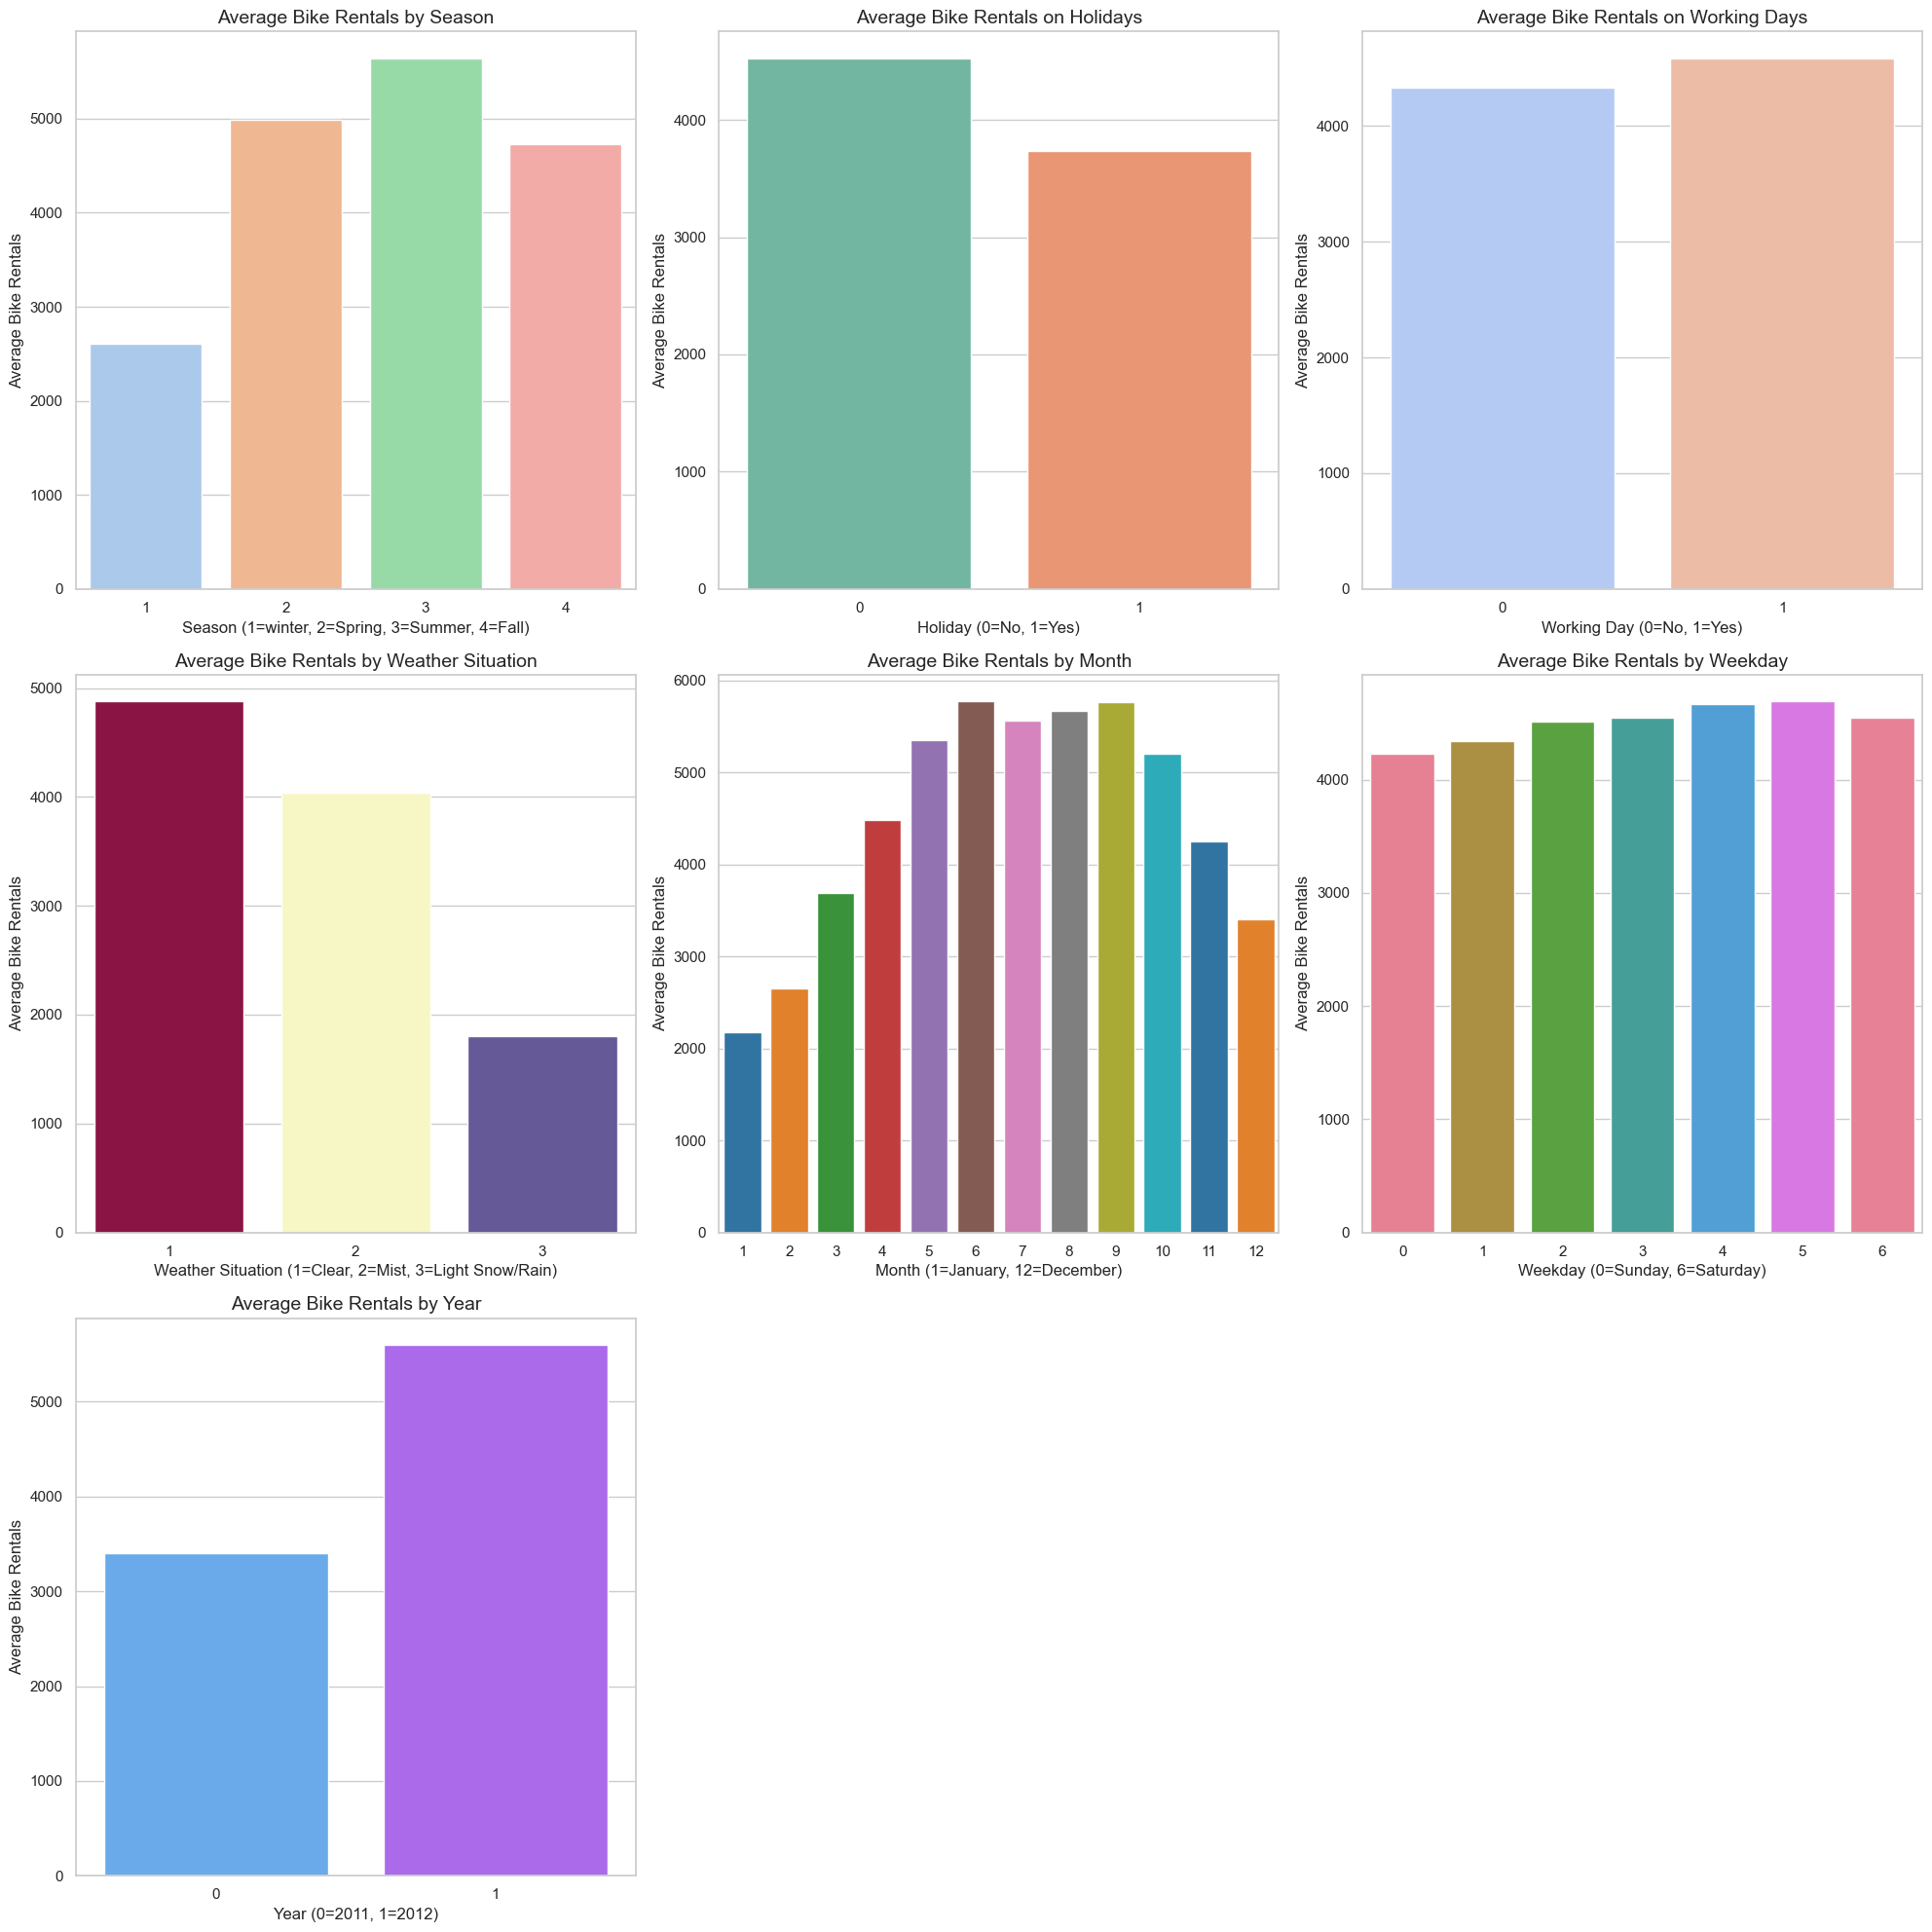

In [16]:
# Set the style for the plots
sns.set_theme(style="whitegrid")

# Set the figure size for the bar plots
plt.figure(figsize=(20, 20))

# Bar plot for Season
plt.subplot(3, 3, 1)
sns.barplot(x='season', y='cnt', data=df_day, errorbar=None, palette='pastel', hue='season', dodge=False)
plt.title('Average Bike Rentals by Season', fontsize=14)
plt.xlabel('Season (1=winter, 2=Spring, 3=Summer, 4=Fall)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend([], [], frameon=False)

# Bar plot for Holiday
plt.subplot(3, 3, 2)
sns.barplot(x='holiday', y='cnt', data=df_day, errorbar=None, palette='Set2', hue='holiday', dodge=False)
plt.title('Average Bike Rentals on Holidays', fontsize=14)
plt.xlabel('Holiday (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend([], [], frameon=False)

# Bar plot for Working Day
plt.subplot(3, 3, 3)
sns.barplot(x='workingday', y='cnt', data=df_day, errorbar=None, palette='coolwarm', hue='workingday', dodge=False)
plt.title('Average Bike Rentals on Working Days', fontsize=14)
plt.xlabel('Working Day (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend([], [], frameon=False)

# Bar plot for Weather Situation
plt.subplot(3, 3, 4)
sns.barplot(x='weathersit', y='cnt', data=df_day, errorbar=None, palette='Spectral', hue='weathersit', dodge=False)
plt.title('Average Bike Rentals by Weather Situation', fontsize=14)
plt.xlabel('Weather Situation (1=Clear, 2=Mist, 3=Light Snow/Rain)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend([], [], frameon=False)

# Bar plot for Month
plt.subplot(3, 3, 5)
sns.barplot(x='mnth', y='cnt', data=df_day, errorbar=None, palette='tab10', hue='mnth', dodge=False)
plt.title('Average Bike Rentals by Month', fontsize=14)
plt.xlabel('Month (1=January, 12=December)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend([], [], frameon=False)

# Bar plot for Weekday
plt.subplot(3, 3, 6)
sns.barplot(x='weekday', y='cnt', data=df_day, errorbar=None, palette='husl', hue='weekday', dodge=False)
plt.title('Average Bike Rentals by Weekday', fontsize=14)
plt.xlabel('Weekday (0=Sunday, 6=Saturday)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend([], [], frameon=False)

# Bar plot for Year
plt.subplot(3, 3, 7)
sns.barplot(x='yr', y='cnt', data=df_day, errorbar=None, palette='cool', hue='yr', dodge=False)
plt.title('Average Bike Rentals by Year', fontsize=14)
plt.xlabel('Year (0=2011, 1=2012)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend([], [], frameon=False)

# Adjust layout and display the bar plots
plt.tight_layout()
plt.show()


### Observations so far:
* Rentals are lowest in Winter (Season 1) and highest in Summer (Season 3).
* Rentals increased significantly in 2012 compared to 2011. There is an outlier in 2012 representing a day with unusually low rentals.
* Rentals are generally higher on non-holidays compared to holidays. Non-holidays exhibit a wider spread of rentals, while holidays have a smaller range.
* Rentals are slightly higher on working days, but the difference between working and non-working days is not substantial. Variability in rentals is similar for both categories.
* Clear weather shows the highest median bike rentals. Misty weather has a moderate decrease in rentals, followed by misty conditions. Light snow/rain significantly reduces bike
* Rentals increase from January, peak in summer months (June, July, and August), and decline toward December.
* Bike rentals are fairly consistent across weekdays, with no significant variation in medians.

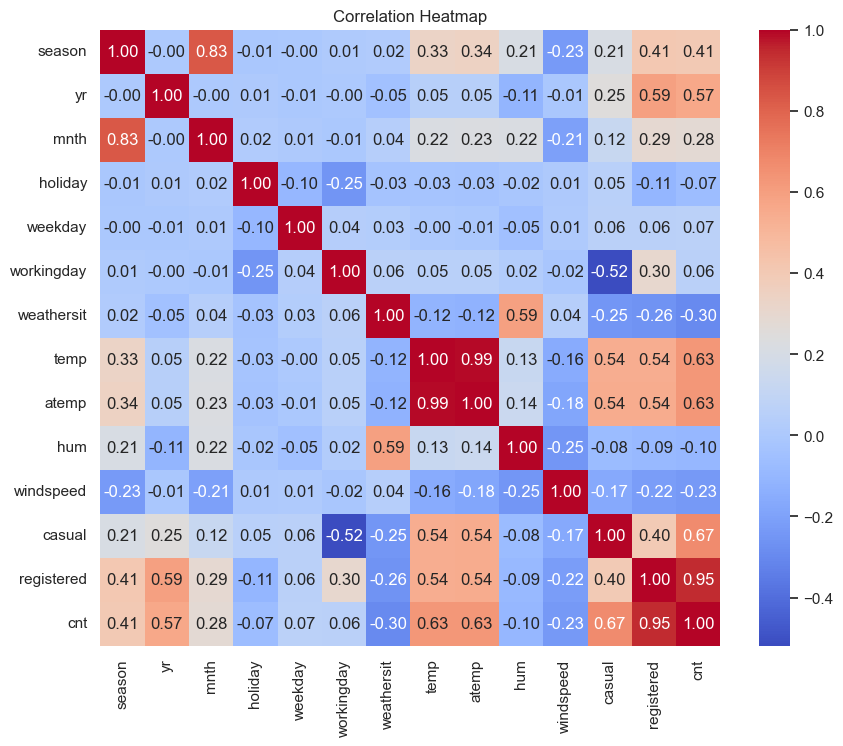

In [17]:
# Drop non-numeric columns for correlation calculation
numeric_columns = df_day.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Observations
* Registered users, temperature, and season show strong positive correlations with total rentals (cnt).
* Weather situation (poor weather) and wind speed negatively impact bike rentals.
* Rentals increased from 2011 to 2012 (yr), and higher usage is observed in warmer months.
* Strong correlation between temp and atemp indicates redundancy, suggesting potential feature reduction.

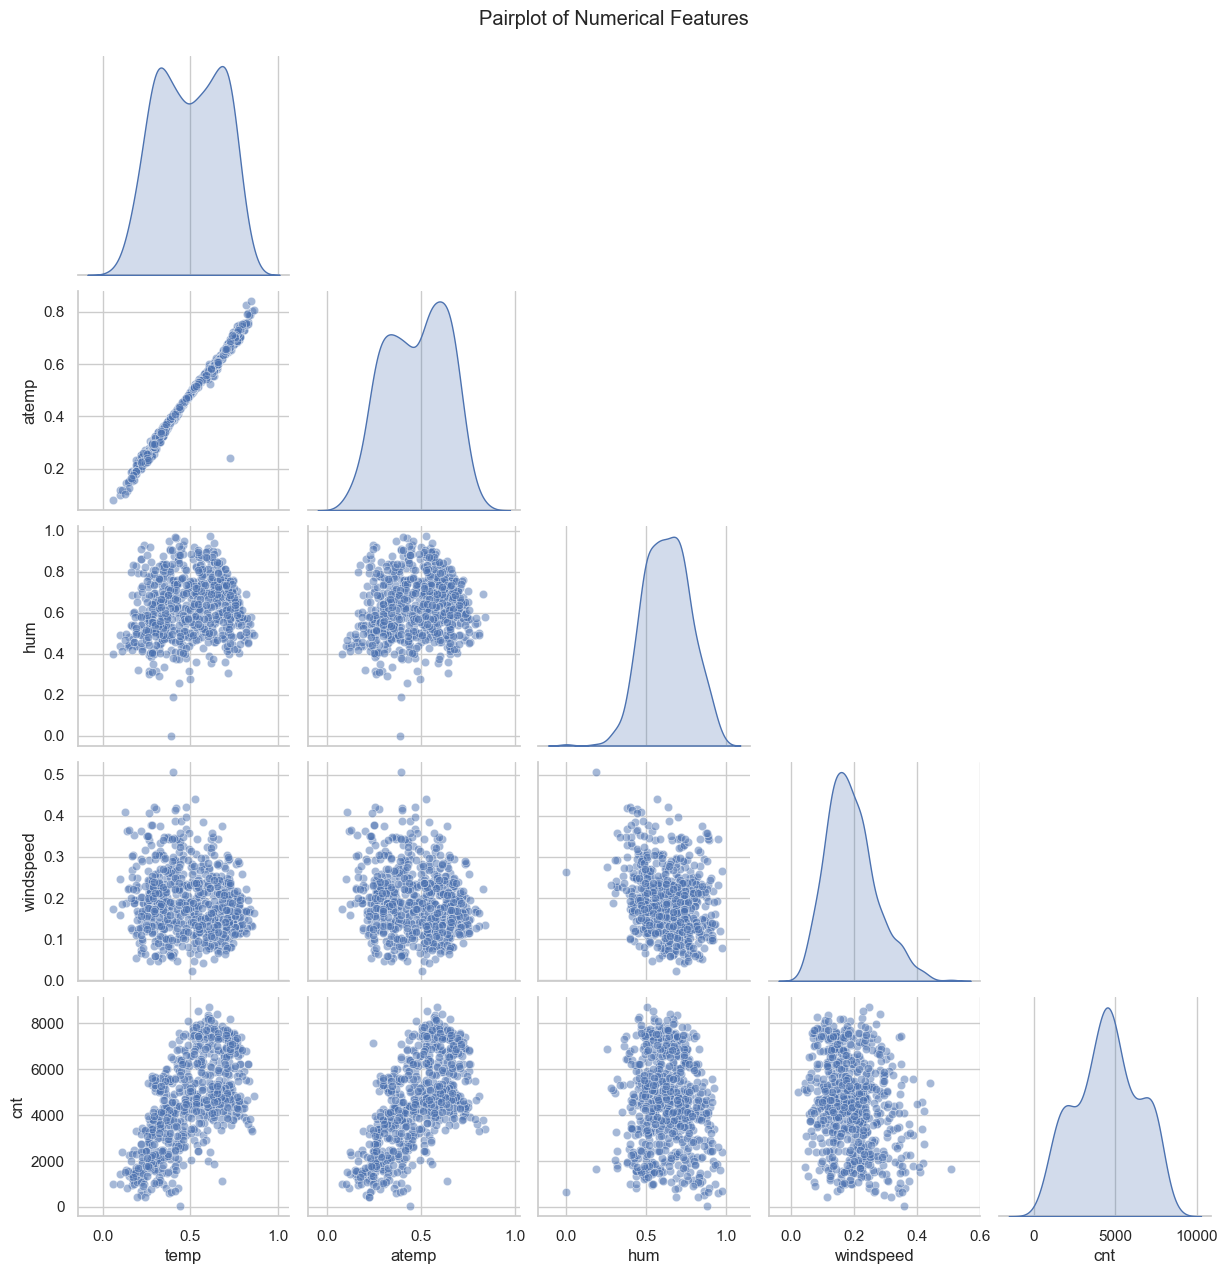

In [18]:
# Selecting numerical features
num_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Creating the pairplot
sns.pairplot(df_day[num_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

### Observations
* Temperature (temp) and "Feels Like" Temperature (atemp) show a strong positive correlation, indicating they are closely related and both significantly influence bike rentals.
* Bike rentals (cnt) increase with temperature (temp) and "feels like" temperature (atemp), suggesting warmer weather leads to higher bike usage.
* Humidity (hum) and windspeed (windspeed) have weak or unclear relationships with bike rentals (cnt), showing no significant impact on the number of rentals.
* Distributions of variables:
    * temp and atemp exhibit bimodal distributions, suggesting bike rentals are concentrated in specific temperature ranges.
    * hum is slightly right-skewed, while windspeed is strongly right-skewed, indicating most days have low windspeed and moderate humidity.
    * cnt shows a multimodal pattern, with bike rentals frequently peaking around 4,000 and 6,000 rentals.
* Outliers are present in bike rentals, with a few days having unusually high or low rentals compared to typical patterns.

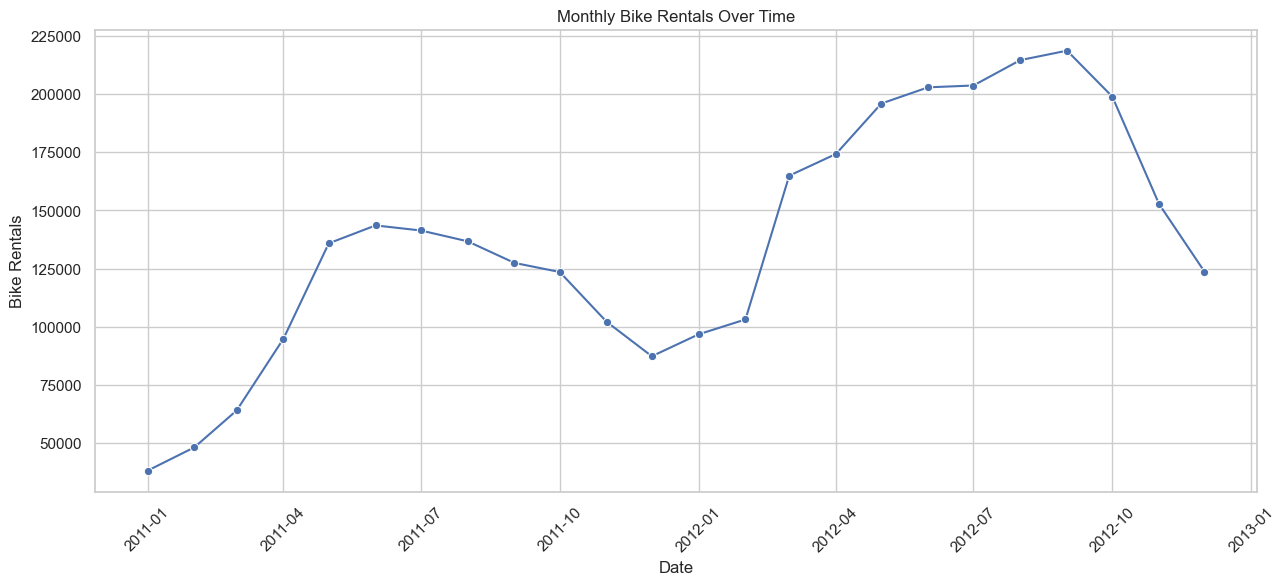

In [19]:
# Convert 'dteday' to datetime if not already done
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Group by month and aggregate only numeric columns
df_day_monthly = df_day.groupby(df_day['dteday'].dt.to_period('M')).sum(numeric_only=True).reset_index()
df_day_monthly['dteday'] = df_day_monthly['dteday'].dt.to_timestamp()

# Plotting the aggregated data
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='cnt', data=df_day_monthly, marker='o')
plt.title("Monthly Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Bike Rentals")
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

### Observations
* Bike rentals show a clear seasonal pattern, with peaks during the summer and early fall months (e.g., June, July, September).
* Rentals dip during the winter months, particularly in December and January, likely due to colder weather.
* There is an increase in bike rentals from 2011 to 2012, indicating growing popularity or expansion of the bike-sharing program.
* The highest rentals occur around July and September, possibly due to favorable weather or events that drive higher bike usage.
* Significant dips are observed during late fall and winter (e.g., November and December), reflecting reduced demand during colder months.
* After the low in winter 2011, rentals recover sharply in the spring of 2012, following a similar pattern of seasonal increase.

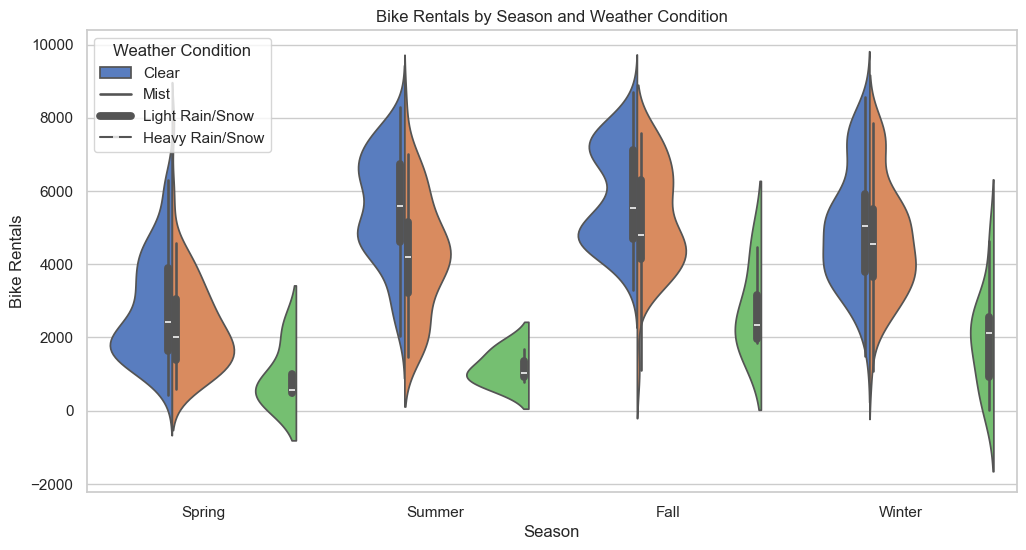

In [20]:
plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(x='season', y='cnt', hue='weathersit', data=df_day, split=True, palette='muted')

# Update the x-axis labels to include descriptive text
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])

# Update the legend to include weather descriptions
plt.legend(title="Weather Condition", labels=["Clear", "Mist", "Light Rain/Snow", "Heavy Rain/Snow"])

# Add title and axis labels
plt.title("Bike Rentals by Season and Weather Condition")
plt.xlabel("Season")
plt.ylabel("Bike Rentals")

plt.show()

### Observations
* Bike rentals are highest during clear weather conditions across all seasons, with the peak occurring in the Summer season, closely followed by Spring.
* Bike rentals drop significantly during inclement weather conditions, such as heavy rain/snow, with the lowest rentals observed during the Winter season.
* There is a noticeable difference in bike rentals between clear and misty (moderate) weather conditions, with clear weather driving higher usage.
* Light rain/snow has a less severe impact on bike rentals compared to heavy rain/snow, as rentals remain relatively higher under light precipitation.
* The seasonal variations are pronounced, with Summer and Spring showing the highest bike rental volumes, followed by Fall and then Winter.
* The range of bike rental values varies significantly across different weather conditions and seasons, reflecting substantial fluctuations in usage patterns based on external factors.

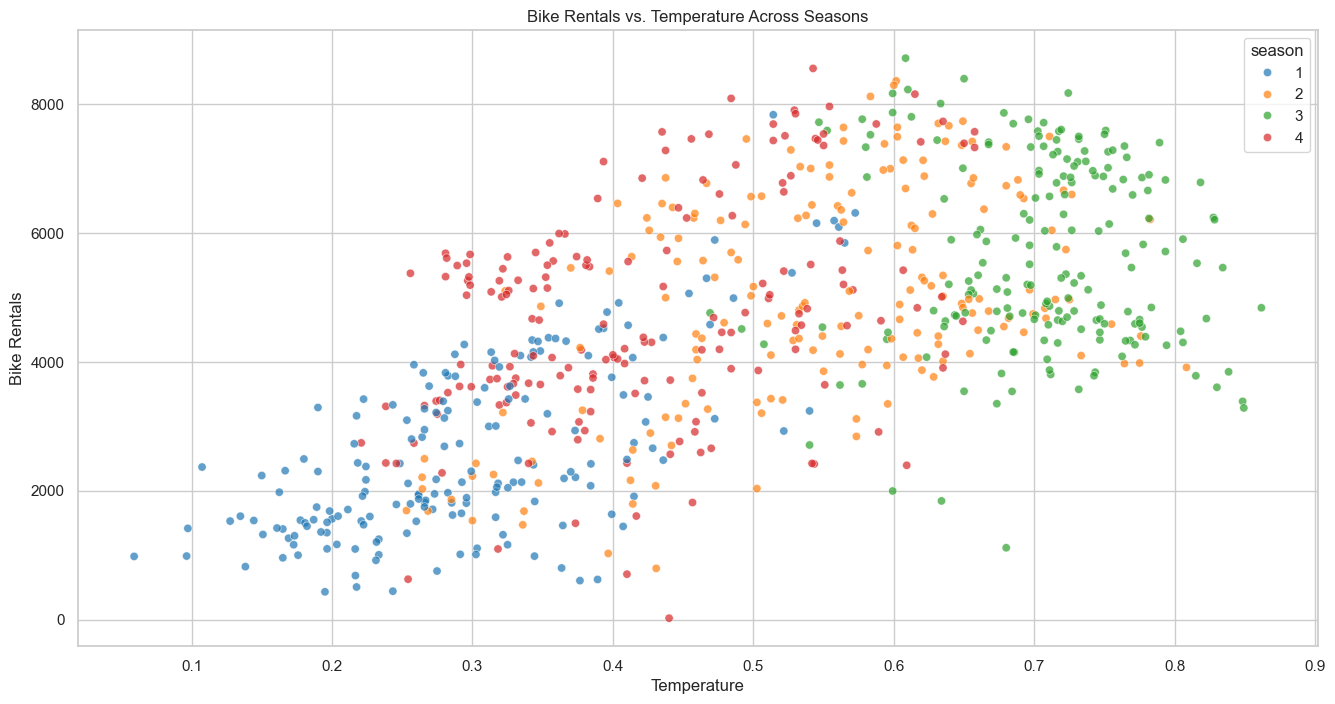

In [21]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='temp', y='cnt', hue='season', data=df_day, palette='tab10', alpha=0.7)
plt.title("Bike Rentals vs. Temperature Across Seasons")
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.show()

### Observation:
* There is a clear positive correlation between temperature and bike rentals, with higher temperatures generally corresponding to higher rental volumes.
* The seasonal patterns show that the highest bike rentals occur during the warmer months (Season 3 - Summer and Season 4 - Fall), while the lowest rentals are seen during the colder months (Season 1 - Winter).
* There is significant variability in rental volumes even within the same season, indicating that factors beyond just temperature, such as weather conditions, day of the week, or events, may also influence bike usage.
* The outliers, or data points that deviate significantly from the main cluster, suggest that there are some exceptional days or conditions that lead to unusually high or low bike rental demand, even within the same season.
* The overall distribution of data points reinforces the observation that temperature is a key driver of bike rental patterns, with warmer weather consistently associated with higher utilization of the shared bicycle system.

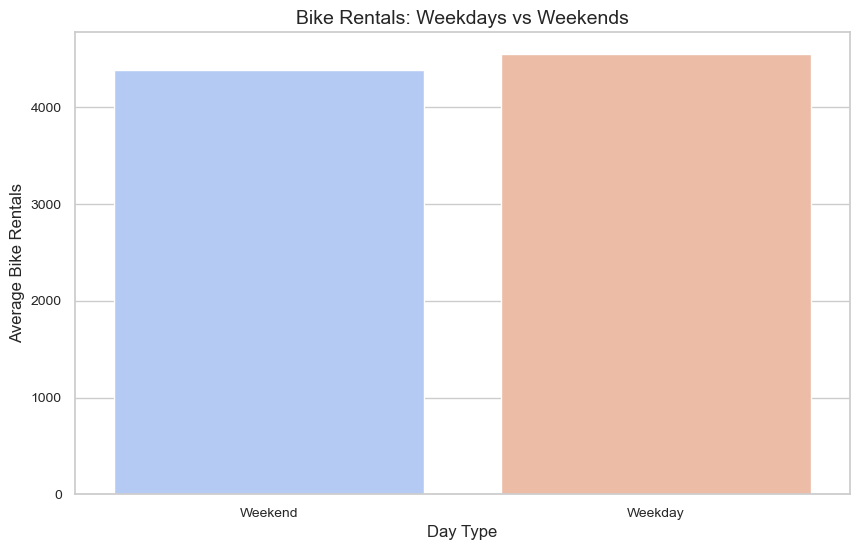

In [22]:
# Create a copy of the dataframe to add the 'day_type' column
df_day_with_type = df_day.copy()

# Add a column to classify weekdays and weekends
df_day_with_type['day_type'] = df_day_with_type['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

# Plot the bar graph
plt.figure(figsize=(10, 6))

# Adding hue as 'day_type' for clear distinction between Weekday and Weekend
sns.barplot(
    x='day_type', 
    y='cnt', 
    data=df_day_with_type, 
    errorbar=None, 
    hue='day_type', 
    palette=sns.color_palette("coolwarm", 2)
)

# Add title and labels
plt.title("Bike Rentals: Weekdays vs Weekends", fontsize=14)
plt.xlabel("Day Type", fontsize=12)
plt.ylabel("Average Bike Rentals", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

### Observation:
* The bike rentals appear slightly higher on weekdays than on weekends.
* This indicates that bike rentals may be more associated with weekday commuting rather than leisure activities during weekends.

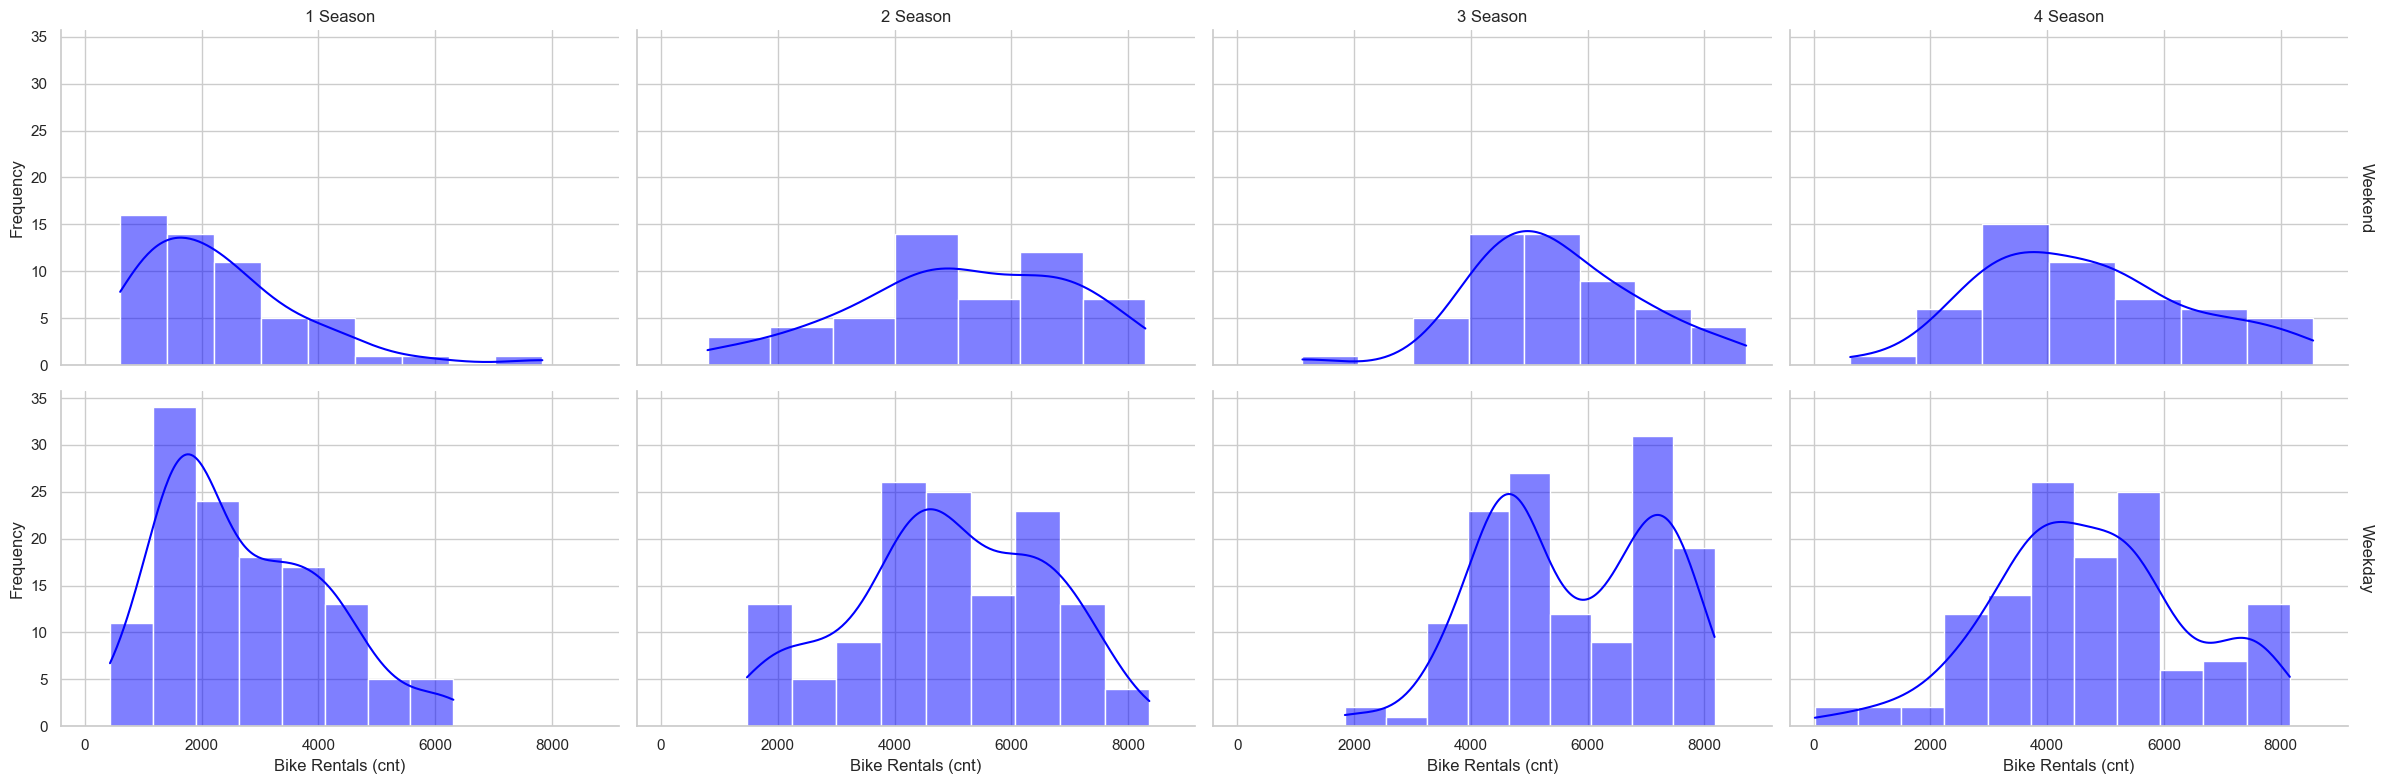

In [23]:
# Ensure 'day_type' column is in the dataframe
df_day_with_type = df_day.copy()
df_day_with_type['day_type'] = df_day_with_type['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

# Facet grid for rentals across seasons and day type
g = sns.FacetGrid(df_day_with_type, col="season", row="day_type", margin_titles=True, height=4, aspect=1.5)
g.map(sns.histplot, "cnt", kde=True, color="blue")

# Add axis labels and titles
g.set_axis_labels("Bike Rentals (cnt)", "Frequency")
g.set_titles(row_template="{row_name}", col_template="{col_name} Season")
plt.show()

### Observation:
* In general, bike rentals peak during the summer season (Season 3) and are lowest during the winter season (Season 1). This aligns with typical weather patterns and the tendency for more outdoor recreational activities in the warmer months.
* The charts also illustrate the differences in bike rental patterns between weekdays and weekends. Weekday rentals tend to be higher than weekend rentals, especially during the Spring (Season 2) and Fall (Season 4) seasons.
* The variability in rental patterns is most pronounced during the Summer season, where there is a clear bimodal distribution with higher weekday rentals and lower weekend rentals. 

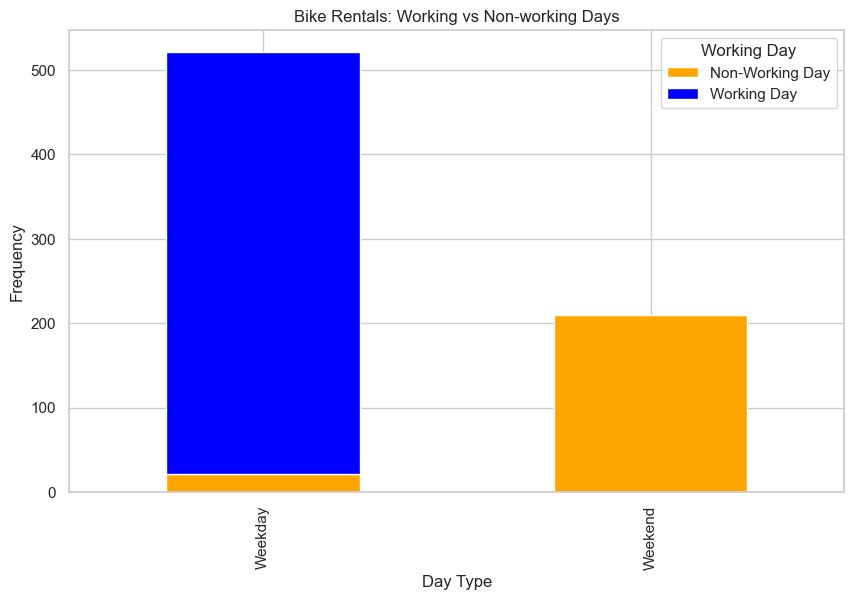

In [24]:
# Create a crosstab for workingday and day_type
crosstab_data = pd.crosstab(df_day_with_type['day_type'], df_day_with_type['workingday'])

# Plot the stacked bar chart
crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'blue'])
plt.title("Bike Rentals: Working vs Non-working Days")
plt.xlabel("Day Type")
plt.ylabel("Frequency")
plt.legend(title="Working Day", labels=["Non-Working Day", "Working Day"])
plt.show()

### Observation:
* Rentals are significantly higher on working days than on non-working days.
* This pattern suggests that most bike rentals are likely associated with weekday commuting and work-related activities rather than weekend leisure use.

### Question 1: "How do weather conditions (temperature, humidity, and wind speed) correlate with daily bike rental patterns during different seasons?"
#### Temperature and Bike Rentals:
* There is a positive correlation between temperature and bike rentals.
* Higher rentals are observed at moderate to high temperatures.
* The trend is most pronounced in Summer (Season 3) and Fall (Season 4), while Winter (Season 1) has the lowest rentals.
* Spring has moderate rentals, typically increasing as temperatures rise.

#### Correlation Analysis:
*The correlation heatmap shows that temperature (temp) has the strongest positive correlation with bike rentals (cnt), with a correlation coefficient of approximately 0.63.
#### Humidity and Bike Rentals:
* Humidity (hum) has a slight negative correlation with bike rentals (-0.1).
* Higher humidity slightly reduces bike rentals.
#### Wind Speed and Bike Rentals:
* Wind speed (windspeed) shows a weak negative correlation with bike rentals (-0.2).
* Stronger winds may deter bike rentals.
#### Seasonal Variation:
* Summer (Season 3) and Spring (Season 2) have the highest rentals.
* Fall (Season 4) also sees high bike rental numbers, though not as high as Summer and Spring.
* Winter (season 1) shows the lowest rentals across all seasons.
#### Conclusion:
* Temperature is the most significant weather factor influencing bike rentals.
* Humidity and wind speed have minor negative effects on rentals.
* Seasonal patterns play a key role, with Summer and Fall being the most active seasons for bike rentals.
### Question 2: Is there a significant difference in mean bike rental numbers between weekdays and weekends across different seasons?
#### Bar Graph of Weekday vs. Weekend Rentals:
* The bar graph of weekday vs. weekend rentals indicates that the average number of rentals is slightly higher on weekdays compared to weekends.
* This difference suggests that weekdays likely see more bike rentals for commuting or work-related purposes.
#### Facet Grid (Bike Rentals by Season and Day Type):
* The facet grid of bike rentals across seasons and day type shows distinct seasonal patterns:
    * Spring (season 2) and Fall (season 4) have higher rentals on both weekdays and weekends, with weekdays slightly outperforming weekends.
    * Summer (season 3) exhibits a bimodal distribution, reflecting different patterns of use on weekdays versus weekends.
    * Winter (season 1) has consistently lower rentals across both weekdays and weekends.
#### Violin Plot (Season vs. Bike Rentals by Weather Condition):
* The violin plot highlights that weekday rentals tend to cluster around higher rental numbers compared to weekends, particularly in seasons with favorable weather conditions (e.g., Summer and Fall).
#### Statistical Difference (Based on Data Visualizations):
* While statistical testing (like ANOVA) is required to quantify significance, the visualizations suggest a consistent pattern of higher rentals on weekdays compared to weekends across all seasons.
#### Conclusion:
* Based on the bar graph, facet grid, and violin plot:
  * Weekdays generally have higher average rentals than weekends across all seasons.
  * The difference is more pronounced in Spring and Fall, where weekday rentals dominate.
  * Summer shows variability, likely due to leisure activities on weekends, while Winter consistently shows the least difference due to lower overall rentals.
* Statistical testing (e.g., ANOVA) can be performed next to confirm the observed differences numerically.

### Handling Outlier

In [25]:
z_scores = zscore(df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)  # Flag rows with any feature's z-score > 3
print("Number of outliers:", outliers.sum())

Number of outliers: 3


In [26]:
#Calculate IQR for Each Feature
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
Q1 = df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].quantile(0.25)
Q3 = df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print("Q1 (25th Percentile):\n", Q1)
print("\nQ3 (75th Percentile):\n", Q3)
print("\nIQR:\n", IQR)

Q1 (25th Percentile):
 temp            0.337083
atemp           0.337842
hum             0.520000
windspeed       0.134950
cnt          3152.000000
Name: 0.25, dtype: float64

Q3 (75th Percentile):
 temp            0.655417
atemp           0.608602
hum             0.730209
windspeed       0.233214
cnt          5956.000000
Name: 0.75, dtype: float64

IQR:
 temp            0.318333
atemp           0.270760
hum             0.210209
windspeed       0.098265
cnt          2804.000000
dtype: float64


In [27]:
#Identify Outliers Using IQR
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound:\n", lower_bound)
print("\nUpper Bound:\n", upper_bound)

# Flag rows as outliers
outliers_iqr = ((df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']] < lower_bound) | 
                (df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']] > upper_bound)).any(axis=1)

# Number of outliers
print("\nNumber of outliers detected using IQR:", outliers_iqr.sum())

# Display the outlier rows
print("\nOutlier rows:")
print(df_day[outliers_iqr])



Lower Bound:
 temp           -0.140416
atemp          -0.068297
hum             0.204687
windspeed      -0.012447
cnt         -1054.000000
dtype: float64

Upper Bound:
 temp             1.132916
atemp            1.014741
hum              1.045521
windspeed        0.380611
cnt          10162.000000
dtype: float64

Number of outliers detected using IQR: 14

Outlier rows:
        dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
44  2011-02-14       1   0     2        0        1           1           1   
49  2011-02-19       1   0     2        0        6           0           1   
68  2011-03-10       1   0     3        0        4           1           3   
93  2011-04-04       2   0     4        0        1           1           1   
94  2011-04-05       2   0     4        0        2           1           2   
292 2011-10-20       4   0    10        0        4           1           1   
382 2012-01-18       1   1     1        0        3           1           1   
407

In [28]:
# Remove outliers
df_day_cleaned_iqr = df_day[~outliers_iqr]

# Compare dataset shapes
print("\nShape of the dataset before removing outliers:", df_day.shape)
print("Shape of the dataset after removing outliers:", df_day_cleaned_iqr.shape)



Shape of the dataset before removing outliers: (731, 15)
Shape of the dataset after removing outliers: (717, 15)


In [29]:
# Descriptive statistics before outlier removal
print("\nStatistics before removing outliers:")
print(df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe())

# Descriptive statistics after outlier removal
print("\nStatistics after removing outliers:")
print(df_day_cleaned_iqr[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe())


Statistics before removing outliers:
             temp       atemp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.474354    0.627894    0.190486  4504.348837
std      0.183051    0.162961    0.142429    0.077498  1937.211452
min      0.059130    0.079070    0.000000    0.022392    22.000000
25%      0.337083    0.337842    0.520000    0.134950  3152.000000
50%      0.498333    0.486733    0.626667    0.180975  4548.000000
75%      0.655417    0.608602    0.730209    0.233214  5956.000000
max      0.861667    0.840896    0.972500    0.507463  8714.000000

Statistics after removing outliers:
             temp       atemp         hum   windspeed          cnt
count  717.000000  717.000000  717.000000  717.000000   717.000000
mean     0.497365    0.476252    0.631562    0.186287  4532.843794
std      0.183617    0.163155    0.139222    0.071786  1933.542429
min      0.059130    0.079070    0.254167    0.022392 

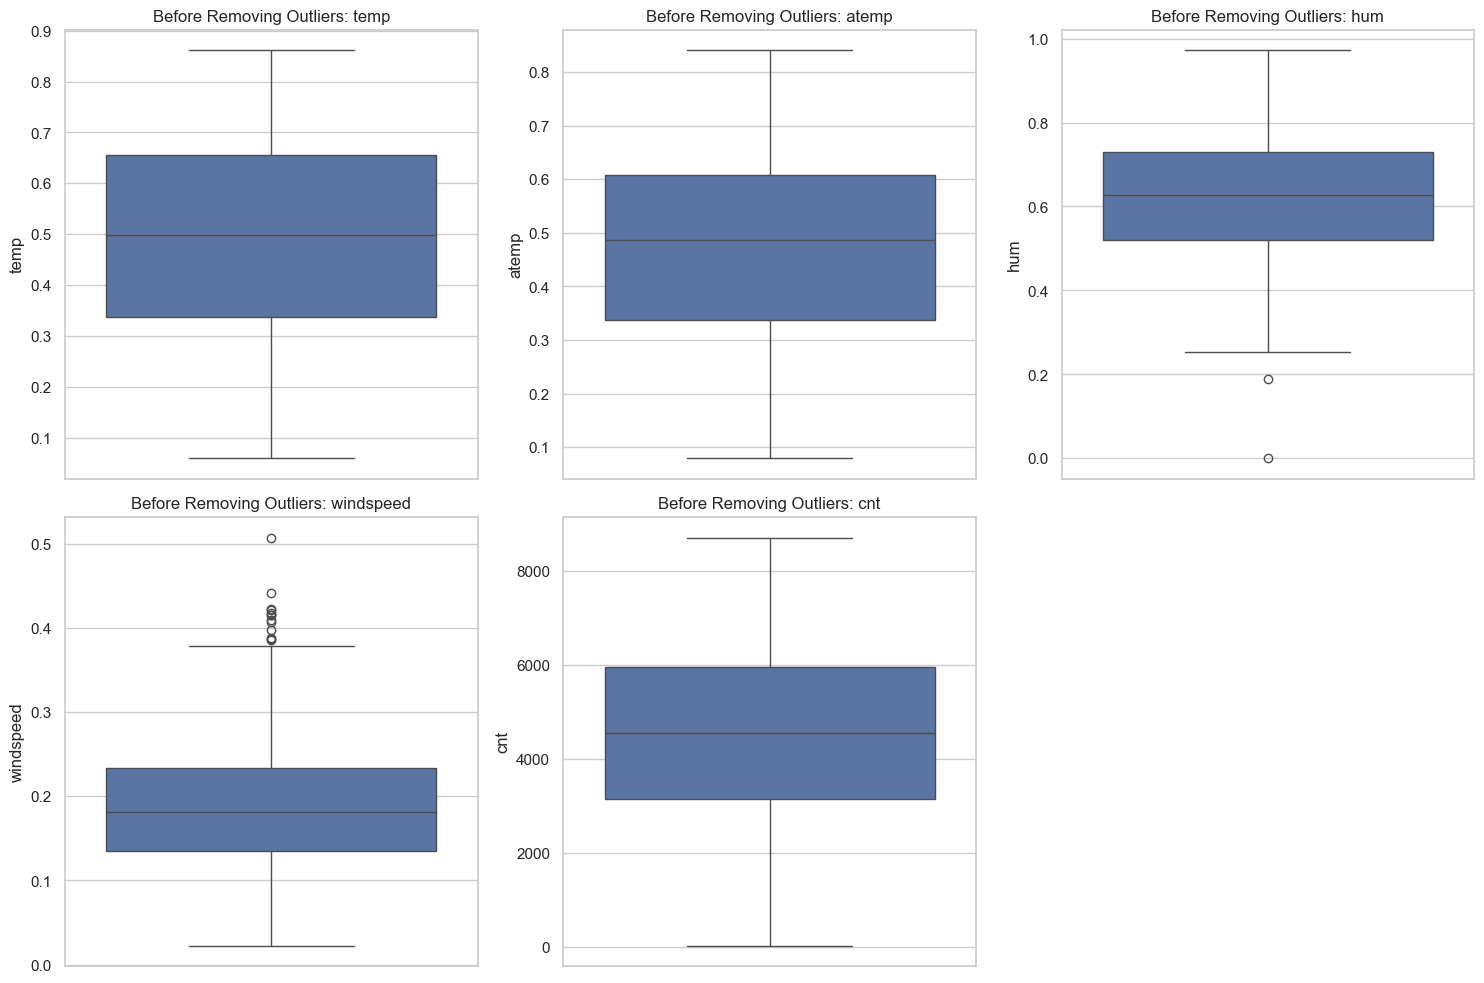

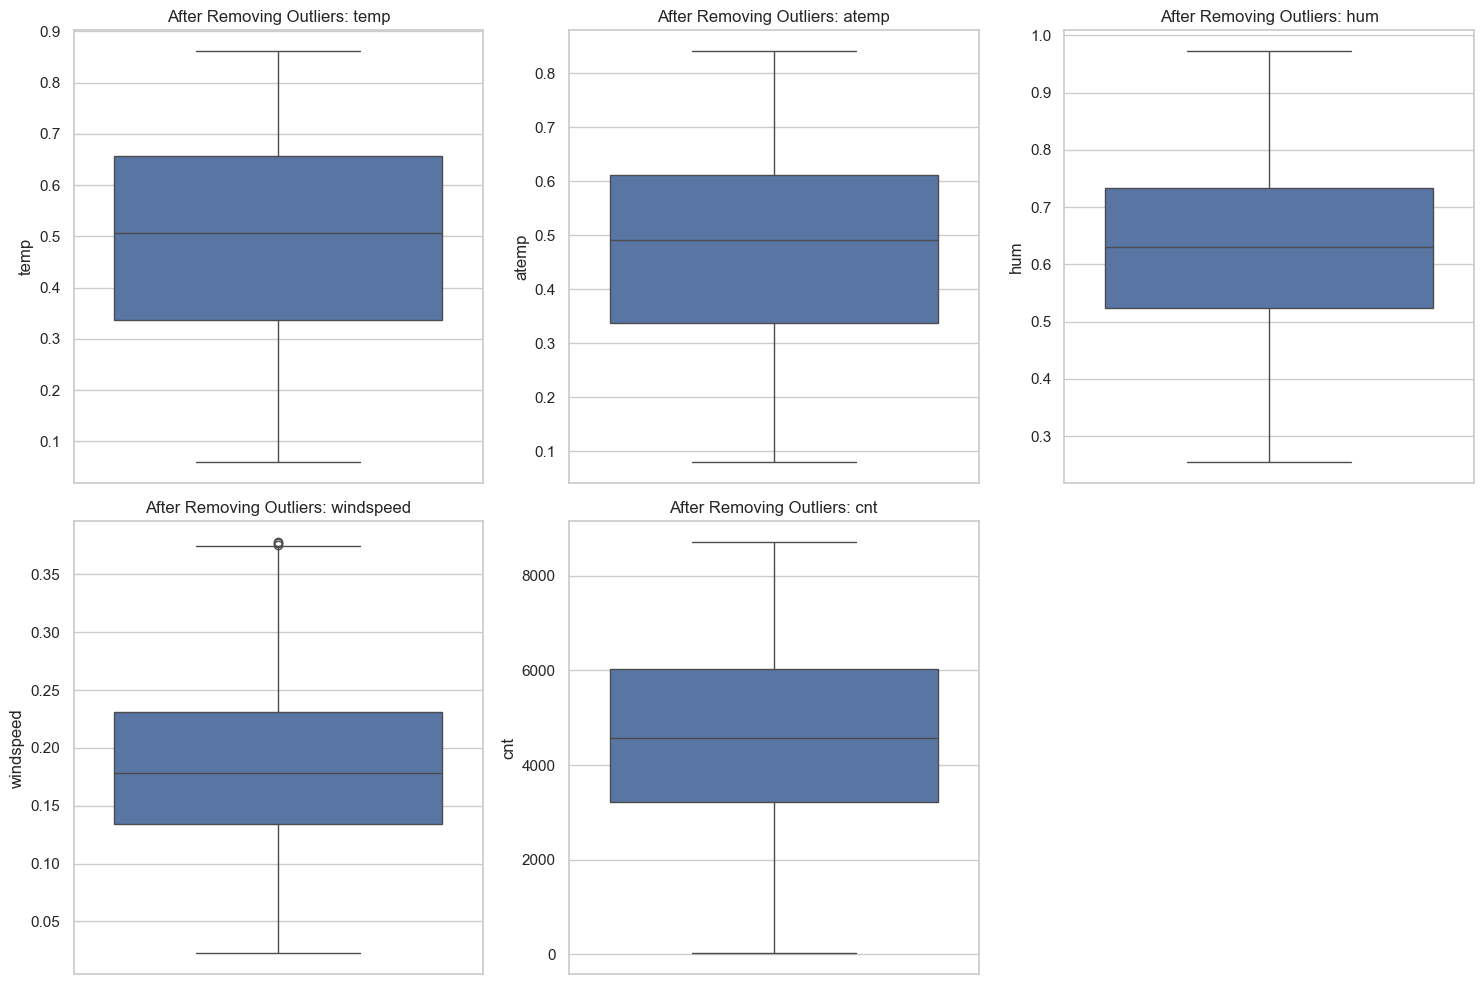

In [30]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Features to analyze
features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Plot boxplots before removing outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_day[feature])
    plt.title(f"Before Removing Outliers: {feature}")
plt.tight_layout()
plt.show()

# Remove outliers using IQR for each feature
df_day_no_outliers = df_day.copy()
for feature in features:
    df_day_no_outliers = remove_outliers_iqr(df_day_no_outliers, feature)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_day_no_outliers[feature])
    plt.title(f"After Removing Outliers: {feature}")
plt.tight_layout()
plt.show()


### Feature scaling

In [31]:
# Identify numerical features for scaling
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Initialize scaler
scaler = StandardScaler()

# Scale numerical features
scaled_features = scaler.fit_transform(df_day_no_outliers[numerical_features])

# Convert scaled features back to a DataFrame
df_scaled = df_day_no_outliers.copy()
df_scaled[numerical_features] = scaled_features

print("Scaled Data Sample:")
print(df_scaled[numerical_features].head())

Scaled Data Sample:
       temp     atemp       hum  windspeed       cnt
0 -0.834917 -0.690789  1.252619  -0.360218 -1.836174
1 -0.729673 -0.751424  0.463789   0.867803 -1.931403
2 -1.640433 -1.759355 -1.396508   0.864597 -1.647787
3 -1.620617 -1.620022 -0.295614  -0.362309 -1.537550
4 -1.473703 -1.514846 -1.398779   0.008552 -1.517883


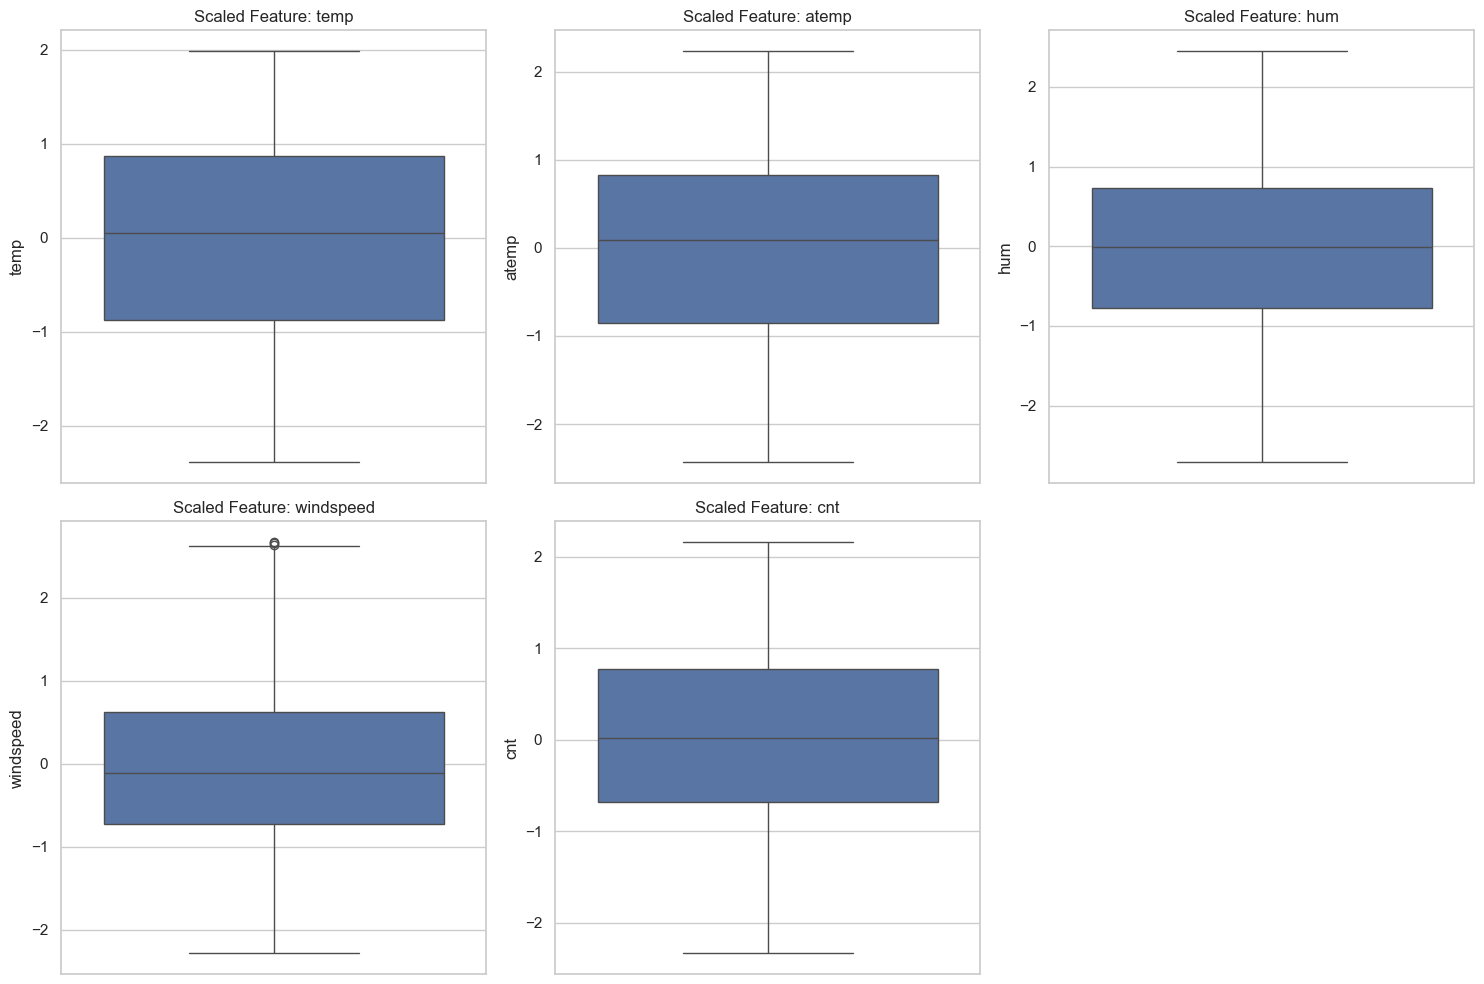

In [32]:
# Visualize scaled features using boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_scaled[feature])
    plt.title(f"Scaled Feature: {feature}")
plt.tight_layout()
plt.show()

### Why Scaling is Needed:
* Scaling is essential because different features (e.g., temperature, humidity, windspeed) might have varying ranges. Without scaling, features with larger ranges could dominate the training of machine learning models, leading to biased results.
* After scaling, all features are standardized with a mean of 0 and standard deviation of 1 (for z-score scaling), making them easier to compare and analyze.
### Changes After Scaling:
#### Visualization Changes:
* Before scaling, boxplots showed features like cnt and temp with much larger ranges compared to windspeed. After scaling, all features fit within the same range (-2 to +2 for most data points).
#### Uniformity Across Features:
* Features now have similar means and variances, reducing dominance by features with larger scales.
#### No Effect on Distribution:
* Scaling does not change the shape of the distribution (e.g., skewness, multimodality). However, the scale on which features are measured becomes consistent.
#### Improved Outlier Detection:
* Post-scaling boxplots make it easier to visually identify extreme values that remain outside the interquartile range or z-score thresholds. 

### ANOVA (Analysis of Variance)

In [34]:
# Ensure the categorical variables are appropriately labeled
df_day_with_type['season'] = df_day_with_type['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
df_day_with_type['day_type'] = df_day_with_type['day_type'].astype('category')

# Group the data by seasons and day types
grouped_data = df_day_with_type.groupby(['season', 'day_type'], observed=True)['cnt'].apply(list)

# Get unique seasons for iteration
unique_seasons = grouped_data.index.get_level_values(0).unique()

# Perform ANOVA for each season
for season in unique_seasons:
    try:
        weekday_rentals = grouped_data[(season, 'Weekday')]
        weekend_rentals = grouped_data[(season, 'Weekend')]

        # Perform ANOVA
        f_stat, p_value = f_oneway(weekday_rentals, weekend_rentals)

        # Print results
        print(f"Season: {season}")
        print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}\n")
    except KeyError:
        print(f"Data for 'Weekday' or 'Weekend' is missing for season: {season}")

Season: Fall
F-statistic: 0.0708, P-value: 0.7906

Season: Spring
F-statistic: 0.7104, P-value: 0.4004

Season: Summer
F-statistic: 1.2155, P-value: 0.2717

Season: Winter
F-statistic: 2.9639, P-value: 0.0869



### Observation
* ANOVA was performed to check for differences in mean bike rentals between weekdays and weekends across each season.
* Output included F-statistic and P-value for each season:
    * Fall: P-value > 0.05, no significant difference.
    * Spring: P-value > 0.05, no significant difference.
    * Summer: P-value > 0.05, no significant difference.
    * Winter: P-value ≈ 0.0869 (slightly closer to significance, but still > 0.05).
This suggests that there is no statistically significant difference in weekday vs. weekend rentals for any season based on ANOVA.

Shapiro-Wilk Test: Statistic=0.9916706085205078, P-value=0.0003924536285921931
Residuals do not appear normally distributed.


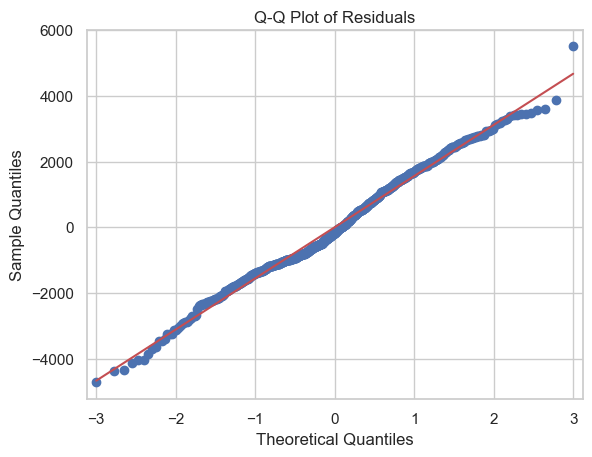

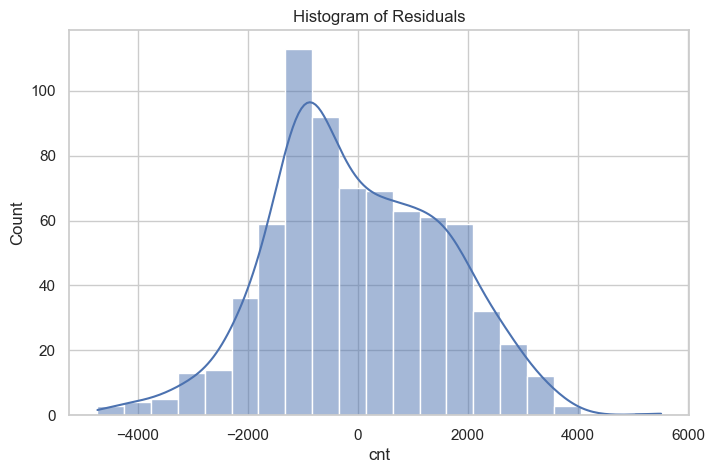

In [36]:
# Suppress the warning by explicitly setting `observed=True`
residuals = df_day_with_type['cnt'] - df_day_with_type.groupby(['season', 'day_type'], observed=True)['cnt'].transform('mean')

# Perform the Shapiro-Wilk test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={stat}, P-value={p}")
if p > 0.05:
    print("Residuals appear normally distributed.")
else:
    print("Residuals do not appear normally distributed.")

# Q-Q Plot
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

### Observation
* Residuals from the ANOVA model were tested for normality using the Shapiro-Wilk test.
    * Result: Residuals were not normally distributed (P-value < 0.05).
* Q-Q Plot and histogram of residuals supported this finding.

Shapiro-Wilk Test (Transformed): Statistic=0.8727400302886963, P-value=6.09423211617548e-24
Residuals do not appear normally distributed.


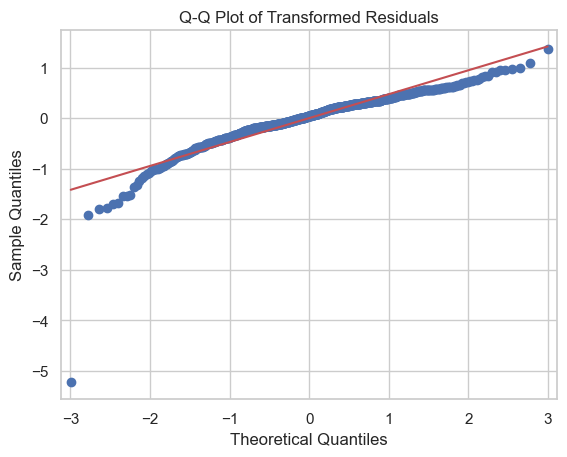

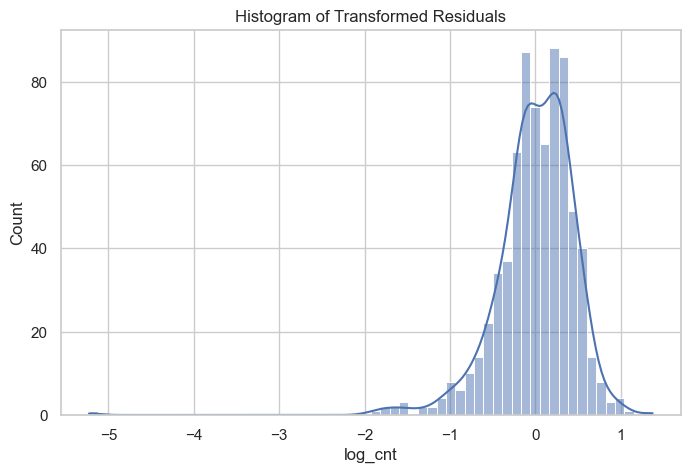

In [37]:
# Apply a log transformation (adding 1 to avoid log(0))
df_day_with_type['log_cnt'] = np.log1p(df_day_with_type['cnt'])

# Check normality of the transformed residuals
residuals_transformed = df_day_with_type['log_cnt'] - df_day_with_type.groupby(['season', 'day_type'], observed=True)['log_cnt'].transform('mean')
stat, p = shapiro(residuals_transformed)
print(f"Shapiro-Wilk Test (Transformed): Statistic={stat}, P-value={p}")
if p > 0.05:
    print("Residuals appear normally distributed.")
else:
    print("Residuals do not appear normally distributed.")

# Q-Q plot for transformed residuals
sm.qqplot(residuals_transformed, line='s')
plt.title("Q-Q Plot of Transformed Residuals")
plt.show()

# Histogram of Transformed Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals_transformed, kde=True)
plt.title("Histogram of Transformed Residuals")
plt.show()

### Observation
* Log transformation was applied to cnt to address non-normality.
* Normality of transformed residuals was tested using Shapiro-Wilk test.
    * Result: Transformed residuals were still not normally distributed (P-value < 0.05).
* Q-Q Plot and histogram of transformed residuals confirmed this.

In [38]:
# Perform Kruskal-Wallis test for each season
for season in grouped_data.index.levels[0]:
    weekday_rentals = grouped_data[season, 'Weekday']
    weekend_rentals = grouped_data[season, 'Weekend']
    
    stat, p = kruskal(weekday_rentals, weekend_rentals)
    print(f"Season: {season}")
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p}\n")

Season: Fall
Kruskal-Wallis Test: Statistic=0.4608081512275445, P-value=0.4972465246737884

Season: Spring
Kruskal-Wallis Test: Statistic=1.1280521636003822, P-value=0.28819119754125494

Season: Summer
Kruskal-Wallis Test: Statistic=1.1088904418045331, P-value=0.2923232690700598

Season: Winter
Kruskal-Wallis Test: Statistic=4.1184382425261346, P-value=0.042418220003987414



### Observation
* Due to non-normality, a non-parametric Kruskal-Wallis test was performed.
* Output included test statistic and P-value for each season:
    * Fall, Spring, Summer: P-value > 0.05, no significant difference.
    * Winter: P-value ≈ 0.042, suggesting a statistically significant difference between weekday and weekend rentals

### Encoding data

In [39]:
# One-Hot Encoding for 'season' and 'day_type'
encoded_df = pd.get_dummies(df_day_with_type, columns=['season', 'day_type'], drop_first=True)

# Display encoded data
print("One-Hot Encoded Data Sample:")
print(encoded_df.head())

One-Hot Encoded Data Sample:
      dteday  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0 2011-01-01   0     1        0        6           0           2  0.344167   
1 2011-01-02   0     1        0        0           0           2  0.363478   
2 2011-01-03   0     1        0        1           1           1  0.196364   
3 2011-01-04   0     1        0        2           1           1  0.200000   
4 2011-01-05   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed  casual  registered   cnt   log_cnt  \
0  0.363625  0.805833   0.160446     331         654   985  6.893656   
1  0.353739  0.696087   0.248539     131         670   801  6.687109   
2  0.189405  0.437273   0.248309     120        1229  1349  7.207860   
3  0.212122  0.590435   0.160296     108        1454  1562  7.354362   
4  0.229270  0.436957   0.186900      82        1518  1600  7.378384   

   season_Spring  season_Summer  season_Winter  day_type_Weekend  
0 

In [40]:
# Check for missing values
print("Missing values in each column:")
print(encoded_df.isnull().sum())

Missing values in each column:
dteday              0
yr                  0
mnth                0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                 0
windspeed           0
casual              0
registered          0
cnt                 0
log_cnt             0
season_Spring       0
season_Summer       0
season_Winter       0
day_type_Weekend    0
dtype: int64


In [41]:
# Check data types
print("Data types of columns:")
print(encoded_df.dtypes)

Data types of columns:
dteday              datetime64[ns]
yr                           int64
mnth                         int64
holiday                      int64
weekday                      int64
workingday                   int64
weathersit                   int64
temp                       float64
atemp                      float64
hum                        float64
windspeed                  float64
casual                       int64
registered                   int64
cnt                          int64
log_cnt                    float64
season_Spring                 bool
season_Summer                 bool
season_Winter                 bool
day_type_Weekend              bool
dtype: object


In [42]:
# Drop irrelevant columns
encoded_df = encoded_df.drop(columns=['dteday'])
encoded_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,log_cnt,season_Spring,season_Summer,season_Winter,day_type_Weekend
0,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,6.893656,False,False,True,True
1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,6.687109,False,False,True,True
2,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,7.207860,False,False,True,False
3,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,7.354362,False,False,True,False
4,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,7.378384,False,False,True,False


### Splitting the dataset into Training and Test set

In [43]:
# Define the features (X) and target variable (y)
X = encoded_df.drop(columns=['cnt', 'casual', 'registered', 'log_cnt'])  # Drop target and irrelevant columns
y = encoded_df['cnt']  # Use 'cnt' as the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)


Training feature set shape: (584, 14)
Testing feature set shape: (147, 14)
Training target set shape: (584,)
Testing target set shape: (147,)


### Model training

In [44]:
#Linear Regression
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Optional: Display actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Actual vs Predicted Values:")
print(results.head())

Model Evaluation Metrics:
Mean Squared Error (MSE): 704221.3299944091
R-squared (R²): 0.8243785529566795
Actual vs Predicted Values:
     Actual    Predicted
703    6606  6287.512476
33     1550  1358.087844
300    3747  3089.324755
456    6041  4767.802287
633    7538  6742.367841


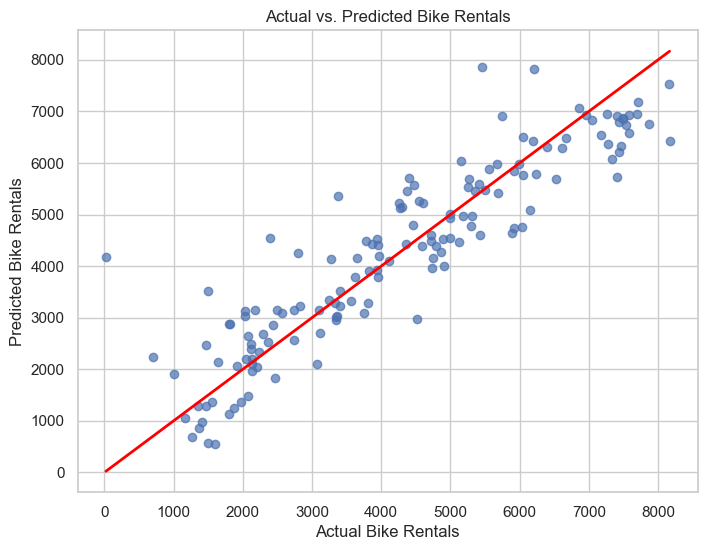

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs. Predicted Bike Rentals")
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.show()

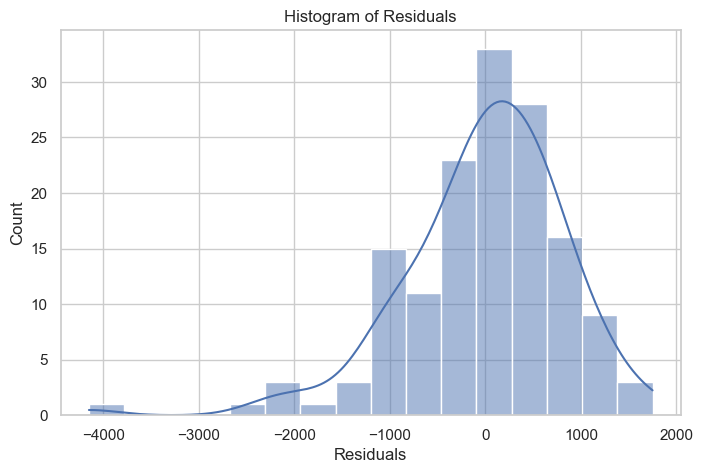

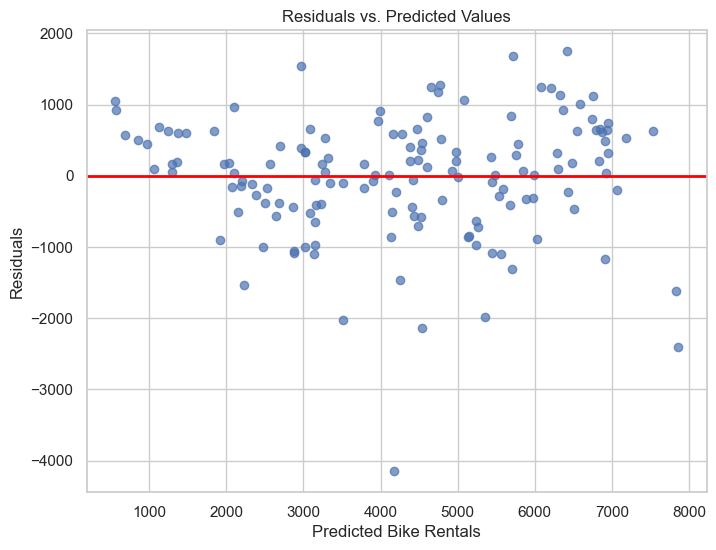

In [46]:
# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Bike Rentals")
plt.ylabel("Residuals")
plt.show()

Feature Importance:
             Feature  Coefficient
6               temp  4271.688075
0                 yr  2016.981689
7              atemp  1117.981360
4         workingday   238.039062
13  day_type_Weekend    86.918607
3            weekday    70.327267
1               mnth   -18.225308
2            holiday  -324.957669
10     season_Spring  -519.705246
5         weathersit  -642.823628
11     season_Summer  -891.733579
8                hum  -965.206250
12     season_Winter -1697.071936
9          windspeed -2551.449074


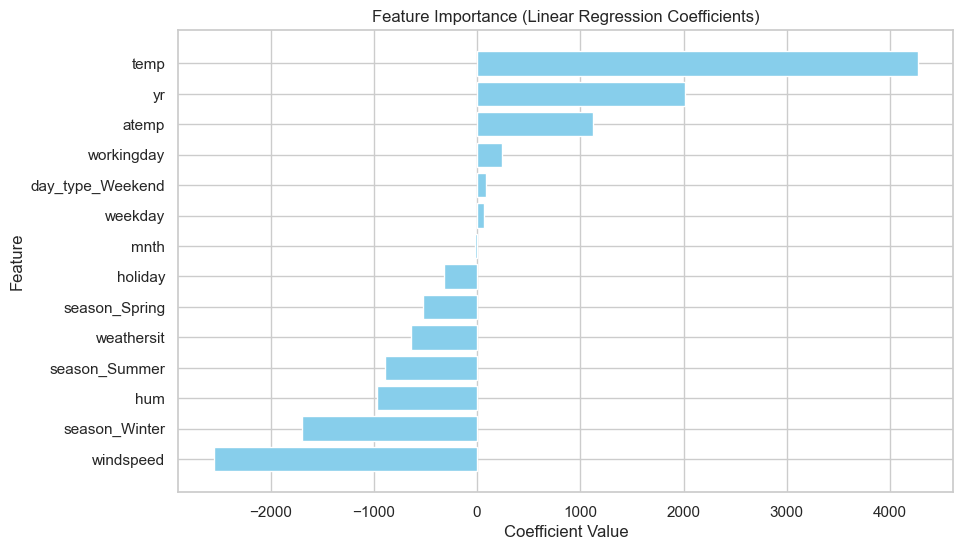

In [47]:
# Extract feature importance (coefficients) from the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display feature importance
print("Feature Importance:")
print(coefficients)

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [48]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R-squared (R²): {rf_r2}")


Random Forest Model Evaluation:
Mean Squared Error (MSE): 469277.8038782312
R-squared (R²): 0.8829696808770889


In [49]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print("Gradient Boosting Model Evaluation:")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"R-squared (R²): {gb_r2}")

Gradient Boosting Model Evaluation:
Mean Squared Error (MSE): 415746.006797297
R-squared (R²): 0.8963196480901776


In [50]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
grid_y_pred = best_rf_model.predict(X_test)

grid_mse = mean_squared_error(y_test, grid_y_pred)
grid_r2 = r2_score(y_test, grid_y_pred)

print("Best Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {grid_mse}")
print(f"R-squared (R²): {grid_r2}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, m

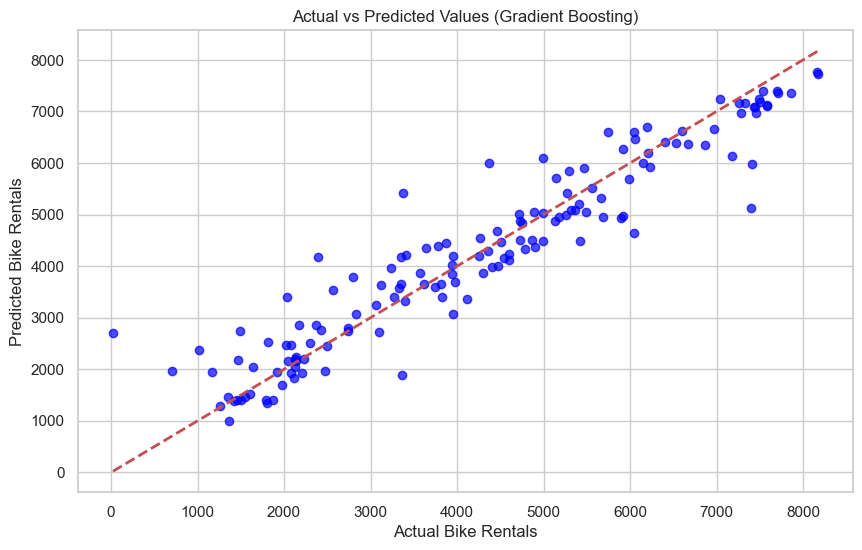

In [51]:
# Visualize Actual vs Predicted for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Actual vs Predicted Values (Gradient Boosting)")
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.show()

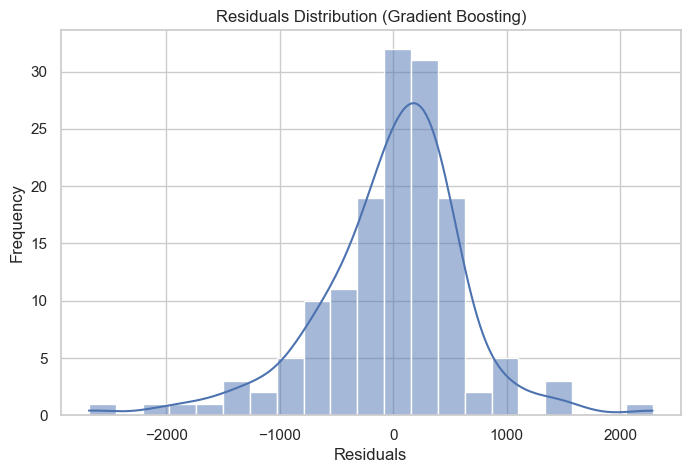

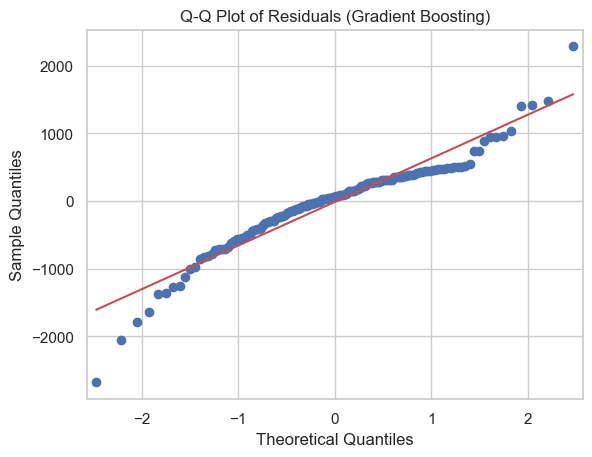

In [52]:
# Calculate residuals
gb_residuals = y_test - gb_y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(gb_residuals, kde=True)
plt.title("Residuals Distribution (Gradient Boosting)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot of residuals
import statsmodels.api as sm
sm.qqplot(gb_residuals, line='s')
plt.title("Q-Q Plot of Residuals (Gradient Boosting)")
plt.show()

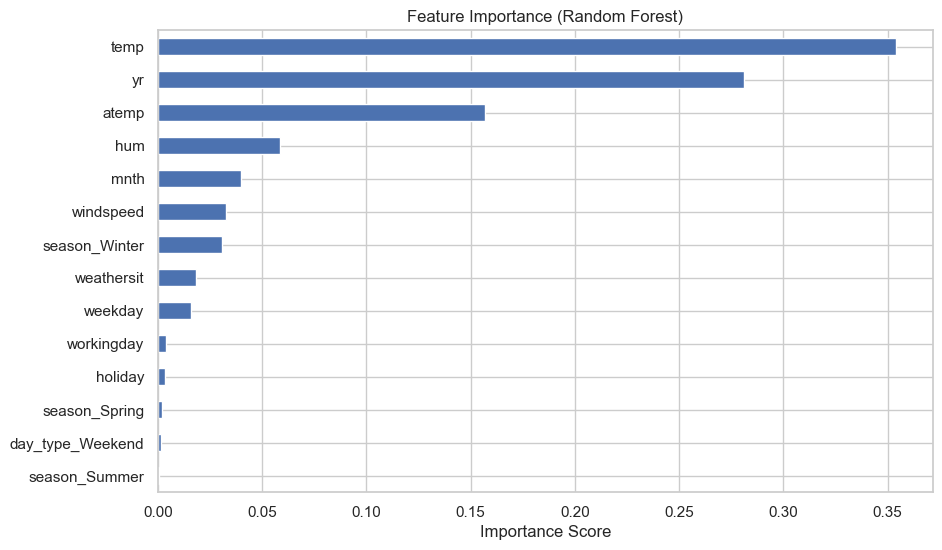

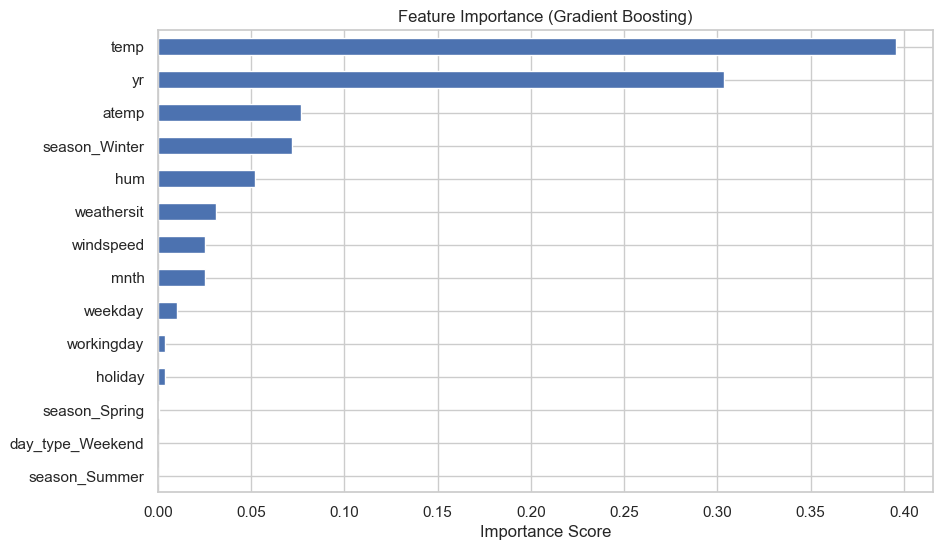

In [53]:
# Random Forest Feature Importance
plt.figure(figsize=(10, 6))
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_importances.sort_values().plot(kind='barh', title="Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

# Gradient Boosting Feature Importance
plt.figure(figsize=(10, 6))
gb_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)
gb_importances.sort_values().plot(kind='barh', title="Feature Importance (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.show()

Trying TreeExplainer...
TreeExplainer successful! Generating plots...


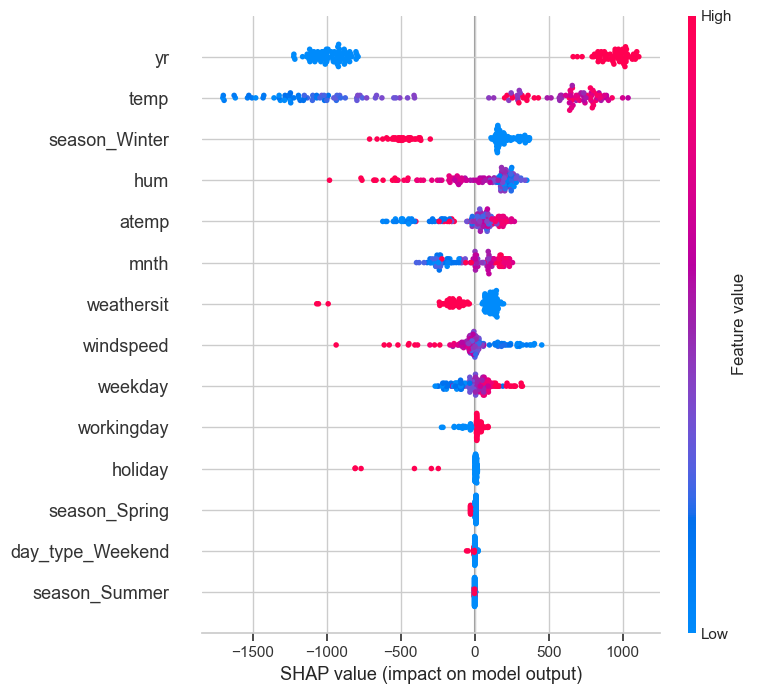

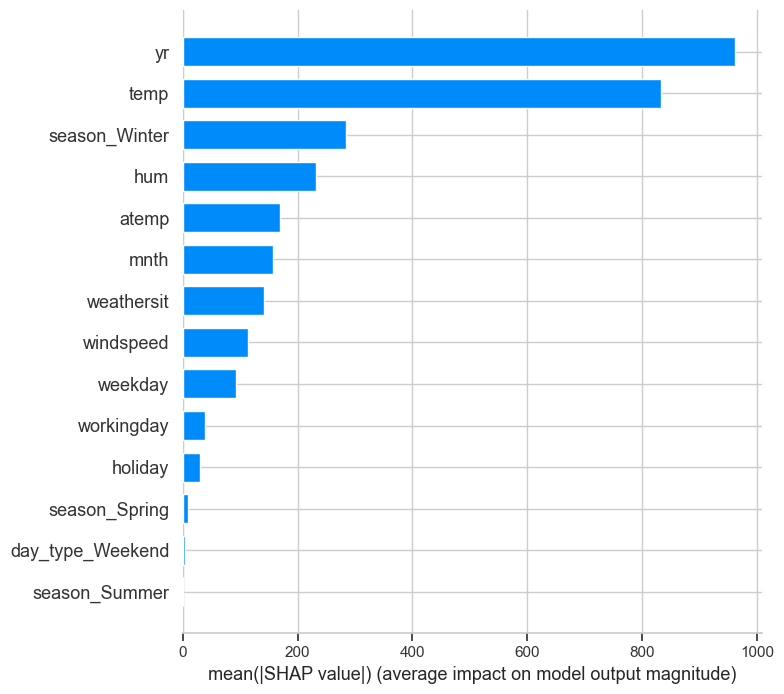

In [54]:
# Ensure X_test is numeric and handle NaNs if any
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)  # Replace missing values with 0 or appropriate imputation

try:
    # Use TreeExplainer for Gradient Boosting
    print("Trying TreeExplainer...")
    explainer = shap.TreeExplainer(gb_model)
    shap_values = explainer.shap_values(X_test)
    
    # Plot SHAP summary
    print("TreeExplainer successful! Generating plots...")
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, plot_type="bar")

except Exception as e:
    print(f"TreeExplainer failed: {e}")
    print("Switching to KernelExplainer...")

    # Fallback to KernelExplainer if TreeExplainer fails
    explainer = shap.KernelExplainer(gb_model.predict, shap.sample(X_test, 100))  # Use sample for efficiency
    shap_values = explainer.shap_values(X_test, nsamples=100)

    # Plot SHAP summary for KernelExplainer
    print("KernelExplainer successful! Generating plots...")
    shap.summary_plot(shap_values, X_test)
    shap.summary_plot(shap_values, X_test, plot_type="bar")


### Model Evaluation

In [55]:
# Display model evaluation metrics in a summary table
model_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Optimized Random Forest'],
    'Mean Squared Error (MSE)': [mse, rf_mse, gb_mse, grid_mse],
    'R-squared (R²)': [r2, rf_r2, gb_r2, grid_r2]
})

print(model_metrics)

                     Model  Mean Squared Error (MSE)  R-squared (R²)
0        Linear Regression             704221.329994        0.824379
1            Random Forest             469277.803878        0.882970
2        Gradient Boosting             415746.006797        0.896320
3  Optimized Random Forest             452770.833339        0.887086


### Observation
Using SHAP, we can evaluate the contribution of each feature to the predictions made by the Gradient Boosting model:
* Important Features:
  * Temperature (temp): Strongest positive influence on bike rentals.
  * Seasonality (season indicators): Significant differences in rentals across seasons.
  * Working Day: Higher rentals on working days compared to holidays.
  * Weather Conditions (weathersit): Bad weather negatively impacts rentals.
* Visualization Insights:
  * SHAP summary plots confirm the dominance of temperature and season-related features.
  * Day type (weekday vs. weekend) and wind speed contribute to rental variations but to a lesser extent.

## Conclusion
### "How do weather conditions (temperature, humidity, and wind speed) correlate with daily bike rental patterns during different seasons?"
Based on the scatter plots, correlation heatmap, and seasonal analysis:
* Temperature:
  * Strong positive correlation with bike rentals (correlation coefficient ≈ 0.63).
  * Rentals increase significantly as temperatures rise, particularly in Summer (Season 3)and Spring (Season 2), which see the highest rental volumes.
  * Winter shows fewer rentals overall, even at higher temperatures.
* Humidity:
  * Slight negative correlation (correlation coefficient ≈ -0.1).
  * High humidity slightly reduces bike rentals, though the effect is weaker compared to temperature.
* Wind Speed:
  * Weak negative correlation (correlation coefficient ≈ -0.2).
  * Stronger winds may deter rentals, but the effect is not significant.
* Seasonal Variations:
  * Summer and Spring have the highest rentals, influenced by favorable weather conditions and moderate to high temperatures
  * Winter sees lower rentals regardless of weather conditions.
  * Spring has moderate rentals, typically increasing as temperatures rise.

Thus, temperature is the most significant weather factor influencing bike rentals, while humidity and wind speed have minor negative effects.
### "Is there a significant difference in mean bike rental numbers between weekdays versus weekends across different seasons?"
Based on ANOVA and visualizations (bar graphs, box plots):
* ANOVA Results:
  * Fall, Spring, and Summer: P-values > 0.05 indicate no statistically significant difference in bike rentals between weekdays and weekends.
  * Winter: P-value ≈ 0.0869, suggesting a slight trend toward significance but still not statistically significant.
* Visualizations:
  * Rentals are slightly higher on weekdays than weekends in most seasons, particularly in Winter, reflecting the influence of commuter behavior.
  * Spring and Summer rentals are consistently high across both weekdays and weekends, driven by favorable weather and leisure activities.
#### Conclusion:
No significant difference in rentals exists between weekdays and weekends in Spring, Summer, and Fall. Winter shows a slight difference, with weekday rentals being more dominant. Overall, seasonal and weather-related factors have a greater influence than day type.